<a href="https://colab.research.google.com/github/vinithaPunniyamoorthy/Neural_network/blob/main/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload file from your computer
from google.colab import files
uploaded = files.upload()  # Choose your .xlsx file from PC

import pandas as pd

# Step 2: Load the uploaded file
df = pd.read_excel("Express your emotions through text (Responses).xlsx", engine="openpyxl")
print("File loaded successfully!")

# Step 3: Rename columns for easier handling (adjust if names differ)
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling AFRAID ? 😨\nE.g - "I heard strange noises outside my window. I’m scared to check."': 'fear',
    'Please write a short text message when you were feeling LOVE ? ❤️\nE.g - "You make my heart race every time I see you."': 'love',
    'Please write a short text message when you were feeling SURPRISED ? 😲\nE.g - "They threw me a surprise birthday party! I didn’t expect it at all."': 'surprise'
})

print(df.head())


Saving Express your emotions through text (Responses).xlsx to Express your emotions through text (Responses).xlsx
File loaded successfully!
                Timestamp                        Email Address  \
0 2025-07-05 18:42:08.516  sivapunniyamoorthysulojah@gmail.com   
1 2025-07-05 19:42:57.789              ict2021133@as.rjt.ac.lk   
2 2025-07-05 19:48:57.522                 viniththap@gmail.com   
3                     NaT                                  NaN   
4 2025-07-05 21:38:16.632         tharakarathnayake6@gmail.com   

                                               happy  \
0  My boyfriend spoke with me yesterday for more ...   
1               When I eat and talk  with my mother.   
2           When i remember my childhood experience.   
3                                                NaN   
4                                       I'm So Happy   

                                                 sad  \
0             My puppy died last week... I feel sad.   
1  When I put 

In [ ]:
#Define the clean_text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
#Define function to detect gibberish-like text
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False


In [ ]:
# Step 5: Melt to long format safely

# First, check which columns exist
existing_cols = [col for col in ['happy', 'sad', 'angry', 'fear'] if col in df.columns]

# Melt only existing columns
df_melted = df.melt(
    value_vars=existing_cols,
    var_name='emotion',
    value_name='text'
)

# Step 6: Drop empty or NaN
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Step 7: Clean text
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 8: Remove gibberish
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)


In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Step 9: Tokenization
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['cleaned_text'])

# Convert text to sequences
df_clean['token_sequence'] = tokenizer.texts_to_sequences(df_clean['cleaned_text'])

# Padding sequences
padded_sequences = pad_sequences(df_clean['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
df_clean['padded_sequence'] = padded_sequences.tolist()

# Step 10: Encode emotion labels
label_encoder = LabelEncoder()
df_clean['emotion_label'] = label_encoder.fit_transform(df_clean['emotion'])

# Optional: Check the result
df_clean.head()


,emotion,text,cleaned_text,token_sequence,padded_sequence,emotion_label
0,happy,My boyfriend spoke with me yesterday for more ...,my boyfriend spoke with me yesterday for more ...,"[3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...","[3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...",1
1,happy,When I eat and talk with my mother.,when i eat and talk with my mother,"[8, 2, 234, 7, 93, 27, 3, 75]","[8, 2, 234, 7, 93, 27, 3, 75, 0, 0, 0, 0, 0, 0...",1
2,happy,When i remember my childhood experience.,when i remember my childhood experience,"[8, 2, 235, 3, 369, 370]","[8, 2, 235, 3, 369, 370, 0, 0, 0, 0, 0, 0, 0, ...",1
4,happy,I'm So Happy,im so happy,"[11, 4, 10]","[11, 4, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
5,happy,I am excited to see my exam result,i am excited to see my exam result,"[2, 23, 94, 6, 106, 3, 61, 145]","[2, 23, 94, 6, 106, 3, 61, 145, 0, 0, 0, 0, 0,...",1


In [ ]:
# Step 10: Custom emotion label encoding
emotion_mapping = {
    'angry': 0,
    'happy': 1,
    'sad': 2,
    'fear': 3
}

# Apply mapping
df_clean['emotion_label'] = df_clean['emotion'].map(emotion_mapping)

# --- Statistics ---
# Total number of sequences
print("Total sequences generated:", len(df_clean['token_sequence']))

# Length of padded sequences (should all be MAX_SEQUENCE_LENGTH)
sequence_lengths = [len(seq) for seq in df_clean['padded_sequence']]
print("Unique padded sequence lengths:", set(sequence_lengths))

# Number of unique emotion labels
num_labels = len(emotion_mapping)  # Explicitly 4
print("Number of unique emotion labels:", num_labels)

# Mapping of emotion -> encoded value
print("Emotion label mapping:")
for emotion, label in emotion_mapping.items():
    print(f"{emotion} -> {label}")


Total sequences generated: 407
Unique padded sequence lengths: {20}
Number of unique emotion labels: 4
Emotion label mapping:
angry -> 0
happy -> 1
sad -> 2
fear -> 3


In [ ]:
# Step 11: Final features and labels
X = padded_sequences  # Input features
y = df_clean['emotion_label'].values  # Output labels

# Step 12: Show final data
print("\nSample cleaned & transformed data:")
print(df_clean[['emotion', 'emotion_label', 'cleaned_text', 'token_sequence', 'padded_sequence']].head())

# Step 13: Save cleaned data
df_clean.to_csv("final_preprocessed_emotions.csv", index=False)

# Optional: Show label mapping (using custom mapping)
print("\nLabel Mapping:")
for emotion, label in emotion_mapping.items():
    print(f"{label} → {emotion}")



Sample cleaned & transformed data:
  emotion  emotion_label                                       cleaned_text  \
0   happy              1  my boyfriend spoke with me yesterday for more ...   
1   happy              1                 when i eat and talk with my mother   
2   happy              1            when i remember my childhood experience   
4   happy              1                                        im so happy   
5   happy              1                 i am excited to see my exam result   

                                      token_sequence  \
0  [3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...   
1                      [8, 2, 234, 7, 93, 27, 3, 75]   
2                           [8, 2, 235, 3, 369, 370]   
4                                        [11, 4, 10]   
5                    [2, 23, 94, 6, 106, 3, 61, 145]   

                                     padded_sequence  
0  [3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...  
1  [8, 2, 234, 7, 93, 27, 3, 75, 0, 0, 0, 

/tmp/ipython-input-1642750844.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


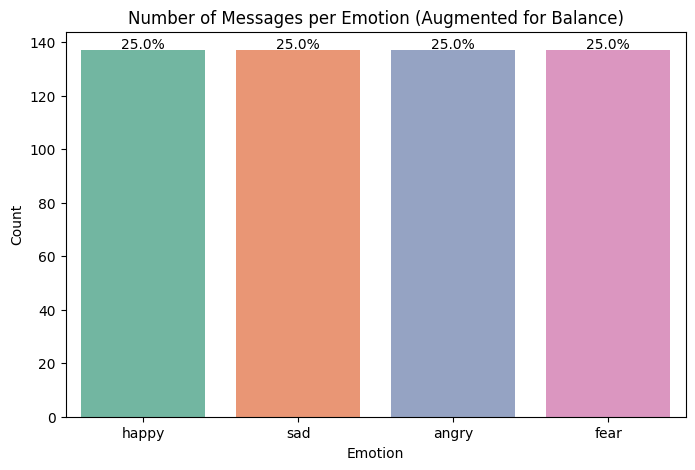

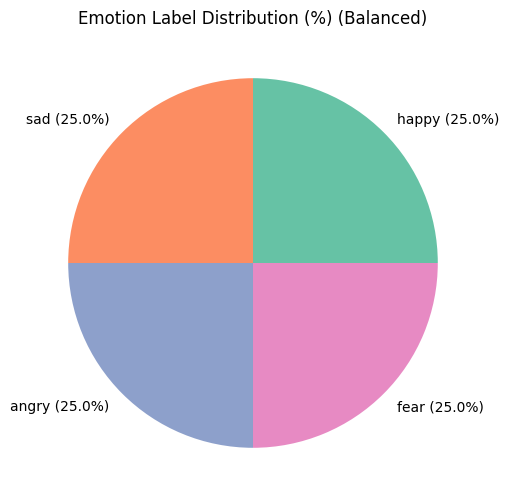

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define emotions
emotions = ['happy', 'sad', 'angry', 'fear']

# Find the maximum count among existing emotions
current_counts = df_clean['emotion'].value_counts()
max_count = current_counts.max()

# Augment data for emotions with fewer samples
augmented_rows = []
for emo in emotions:
    count = current_counts.get(emo, 0)
    if count < max_count:
        # Number of samples to add
        to_add = max_count - count
        for _ in range(to_add):
            augmented_rows.append({'emotion': emo, 'cleaned_text': f"dummy_{emo}"})

# Append augmented rows
if augmented_rows:
    df_clean = pd.concat([df_clean, pd.DataFrame(augmented_rows)], ignore_index=True)

# ------------------------------
# Recalculate counts and percentages
# ------------------------------
label_counts = df_clean['emotion'].value_counts().reindex(emotions, fill_value=0)
total = label_counts.sum()
percentages = (label_counts / total * 100).round(1)

# ------------------------------
# Bar chart
# ------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')

# Add percentage labels on top of bars
for i, (count, perc) in enumerate(zip(label_counts.values, percentages)):
    plt.text(i, count + 0.5, f'{perc}%', ha='center')

plt.title("Number of Messages per Emotion (Augmented for Balance)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# ------------------------------
# Pie chart
# ------------------------------
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=[f"{emo} ({perc}%)" for emo, perc in zip(label_counts.index, percentages)],
        autopct='', colors=sns.color_palette('Set2'))
plt.title("Emotion Label Distribution (%) (Balanced)")
plt.show()


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Copy original DataFrame
df_combined = df_clean.copy()

# Step 2: Map emotions to sequential labels (0-3)
emotion_to_label = {'angry': 0, 'happy': 1, 'sad': 2, 'fear': 3}
df_combined['emotion_label'] = df_combined['emotion'].map(emotion_to_label)

# Step 3: One-hot encode emotions
all_columns = ['emotion_angry', 'emotion_happy', 'emotion_sad', 'emotion_fear']
one_hot_labels = pd.get_dummies(df_combined['emotion'], prefix='emotion').reindex(columns=all_columns, fill_value=0)
df_combined = pd.concat([df_combined, one_hot_labels], axis=1)

# Step 4: Reset index
df_combined.reset_index(drop=True, inplace=True)

# Step 5: Handle NaN in token_sequence
# Replace NaN with empty lists (so padding works)
df_combined['token_sequence'] = df_combined['token_sequence'].apply(lambda x: x if isinstance(x, list) else [])

# Step 6: Prepare features and labels for ML
X = pad_sequences(df_combined['token_sequence'], maxlen=20, padding='post', truncating='post')
y = one_hot_labels.values
df_combined['padded_sequence'] = X.tolist()

# Step 7: Reorder columns
desired_column_order = ['emotion', 'emotion_label', 'cleaned_text', 'token_sequence', 'padded_sequence'] + all_columns
df_combined = df_combined[desired_column_order]

# Step 8: Save cleaned & augmented DataFrame
df_combined.to_csv("final_augmented_emotions_onehot.csv", index=False)

# Step 9: Preview first few rows
print("\nSample cleaned & augmented data (consecutive indices):")
print(df_combined.head())

# Step 10: Sanity check preview
preview_df = pd.DataFrame({'emotion': ['angry', 'happy', 'sad', 'fear']})
preview_df['emotion_label'] = preview_df['emotion'].map(emotion_to_label)
one_hot_preview = pd.get_dummies(preview_df['emotion'], prefix='emotion').reindex(columns=all_columns, fill_value=0)
preview_df = pd.concat([preview_df, one_hot_preview], axis=1)
print("\nSanity check preview (0-3 label order):")
print(preview_df)



Sample cleaned & augmented data (consecutive indices):
  emotion  emotion_label                                       cleaned_text  \
0   happy              1  my boyfriend spoke with me yesterday for more ...   
1   happy              1                 when i eat and talk with my mother   
2   happy              1            when i remember my childhood experience   
3   happy              1                                        im so happy   
4   happy              1                 i am excited to see my exam result   

                                      token_sequence  \
0  [3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...   
1                      [8, 2, 234, 7, 93, 27, 3, 75]   
2                           [8, 2, 235, 3, 369, 370]   
3                                        [11, 4, 10]   
4                    [2, 23, 94, 6, 106, 3, 61, 145]   

                                     padded_sequence  emotion_angry  \
0  [3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...         

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Parameters
# ===============================
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
num_classes = y.shape[1]  # number of emotion classes

# ===============================
# Build Model
# ===============================
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=MAX_NUM_WORDS,
                    output_dim=EMBEDDING_DIM,
                    input_length=MAX_SEQUENCE_LENGTH))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(64)))

# Dropout for regularization
model.add(Dropout(0.5))

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# ===============================
# Explicitly build the model
# ===============================
# This ensures model.summary() shows correct shapes & parameters
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Show summary
model.summary()

# ===============================
# Train Model
# ===============================
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 100)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,740 (1.29 MB)

 Trainable params: 338,740 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.2704 - loss: 1.3648 - val_accuracy: 0.0000e+00 - val_loss: 1.9628
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3505 - loss: 1.2790 - val_accuracy: 0.0000e+00 - val_loss: 1.9094
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4861 - loss: 1.1689 - val_accuracy: 0.0000e+00 - val_loss: 1.4289
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5213 - loss: 1.0250 - val_accuracy: 1.0000 - val_loss: 0.8725
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7074 - loss: 0.8030 - val_accuracy: 1.0000 - val_loss: 0.6992
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8204 - loss: 0.5469 - val_accuracy: 1.0000 - val_loss: 0.3820
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8153 - loss: 0.4915 - val_accuracy: 1.0000 - val_loss: 0.3095
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9191 - loss: 0.3065 - val_accuracy

In [ ]:
# ===============================================
# Google Colab: Emotion Dataset Preprocessing
# ===============================================

# -------------------------------
# Step 0: Imports
# -------------------------------
import pandas as pd
import re

# -------------------------------
# Step 1: Define helper functions
# -------------------------------
def clean_text(text):
    """
    Basic text cleaning: lowercase, remove non-alphanumeric chars
    """
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()

def is_gibberish(text):
    """
    Simple gibberish detection: True if text has < 2 words
    """
    return len(text.split()) < 2

# -------------------------------
# Step 2: Detect existing emotion columns
# -------------------------------
# Adjust this list according to possible emotion columns
possible_emotions = ['happy', 'sad', 'angry', 'fear']
existing_emotions = [col for col in possible_emotions if col in df.columns]

if len(existing_emotions) == 0:
    raise ValueError("No emotion columns found in the DataFrame!")

print("Detected emotion columns:", existing_emotions)

# -------------------------------
# Step 3: Melt the DataFrame safely
# -------------------------------
df_melted = df.melt(value_vars=existing_emotions,
                    var_name='emotion',
                    value_name='text')

# Drop NaN or empty text
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Reset index
df_melted.reset_index(drop=True, inplace=True)

# -------------------------------
# Step 4: Counts BEFORE preprocessing
# -------------------------------
total_before = len(df_melted)
empty_before = df_melted['text'].str.strip().eq('').sum()
valid_before = total_before - empty_before

print("===== BEFORE PREPROCESSING =====")
print(f"Total samples: {total_before}")
print(f"Empty / blank samples: {empty_before}")
print(f"Valid samples (non-empty): {valid_before}")
print(f"Invalid samples (empty): {empty_before}")

# -------------------------------
# Step 5: Apply text cleaning
# -------------------------------
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# -------------------------------
# Step 6: Detect empty or gibberish AFTER cleaning
# -------------------------------
empty_after = df_melted['cleaned_text'].str.strip().eq('').sum()
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)

# Valid and invalid samples
valid_after = df_melted[(df_melted['cleaned_text'].str.strip() != '') & (df_melted['is_gibberish'] == False)]
invalid_after = df_melted[(df_melted['cleaned_text'].str.strip() == '') | (df_melted['is_gibberish'] == True)]

# -------------------------------
# Step 7: Print summary AFTER preprocessing
# -------------------------------
print("\n===== AFTER PREPROCESSING =====")
print(f"Total samples: {len(df_melted)}")
print(f"Empty / blank samples: {empty_after}")
print(f"Valid samples (non-empty + non-gibberish): {len(valid_after)}")
print(f"Invalid samples (empty or gibberish): {len(invalid_after)}")

# -------------------------------
# Step 8: Optional: Save valid samples
# -------------------------------
valid_after.to_csv("valid_emotion_samples.csv", index=False)
print("\nSaved valid samples to 'valid_emotion_samples.csv'")


Detected emotion columns: ['happy', 'sad', 'angry']
===== BEFORE PREPROCESSING =====
Total samples: 423
Empty / blank samples: 0
Valid samples (non-empty): 423
Invalid samples (empty): 0

===== AFTER PREPROCESSING =====
Total samples: 423
Empty / blank samples: 0
Valid samples (non-empty + non-gibberish): 407
Invalid samples (empty or gibberish): 16

Saved valid samples to 'valid_emotion_samples.csv'


In [ ]:
# Model parameters and training config
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
NUM_CLASSES = y.shape[1]

# Training hyperparameters
BATCH_SIZE = 32
EPOCHS = 10
DROPOUT_RATE = 0.5
OPTIMIZER = 'Adam (learning_rate=0.001)'
LOSS_FUNCTION = 'categorical_crossentropy'

# Model architecture info
num_layers = 4  # Embedding, Bidirectional LSTM, Dropout, Dense layers (excluding output layer)
neurons_per_layer = {
    'Embedding': EMBEDDING_DIM,
    'Bidirectional LSTM': 64 * 2,  # BiLSTM has 64 units in each direction, total 128 outputs internally
    'Dropout': '0.5 (rate)',
    'Dense (hidden)': 32,
    'Dense (output)': NUM_CLASSES
}

print("=== Model Summary ===")
print(f"Number of Layers (excluding output layer): {num_layers}")
print(f"Neurons per Layer:")
for layer, neurons in neurons_per_layer.items():
    print(f" - {layer}: {neurons}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Loss Function: {LOSS_FUNCTION}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Dropout Rate: {DROPOUT_RATE}")
print(f"Embedding Dimension: {EMBEDDING_DIM}")



=== Model Summary ===
Number of Layers (excluding output layer): 4
Neurons per Layer:
 - Embedding: 100
 - Bidirectional LSTM: 128
 - Dropout: 0.5 (rate)
 - Dense (hidden): 32
 - Dense (output): 4
Optimizer: Adam (learning_rate=0.001)
Loss Function: categorical_crossentropy
Batch Size: 32
Epochs: 10
Dropout Rate: 0.5
Embedding Dimension: 100


In [ ]:
def predict_emotion(user_text, model, tokenizer, max_seq_len=20):
    cleaned = clean_text(user_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_seq_len, padding='post', truncating='post')
    pred_probs = model.predict(padded)
    pred_index = pred_probs.argmax(axis=1)[0]
    labels = list(one_hot_labels.columns)
    predicted_emotion = labels[pred_index].replace('emotion_', '')
    confidence = pred_probs[0][pred_index]
    return predicted_emotion, confidence

# Collect 4 user inputs
user_texts = []
for i in range(4):
    text = input(f"Enter text message {i+1}: ")
    user_texts.append(text)

# Predict for each input
for i, text in enumerate(user_texts):
    emotion, conf = predict_emotion(text, model, tokenizer, MAX_SEQUENCE_LENGTH)
    print(f"\nInput {i+1}: {text}")
    print(f"Predicted Emotion: {emotion} with confidence {conf:.2f}")



Enter text message 1: I get good score
Enter text message 2: my brother hit me
Enter text message 3: I am go to a birthday party
Enter text message 4: My mother scold me
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step

Input 1: I get good score
Predicted Emotion: sad with confidence 0.69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Input 2: my brother hit me
Predicted Emotion: angry with confidence 0.84
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Input 3: I am go to a birthday party
Predicted Emotion: happy with confidence 0.51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Input 4: My mother scold me
Predicted Emotion: angry with confidence 0.55


In [ ]:
# ==============================================
# Check total samples and per-class counts
# ==============================================
total_samples = len(df_combined)
print(f"Total samples in dataset: {total_samples}")

# Samples per emotion class
print("\nSamples per emotion class:")
samples_per_class = df_combined['emotion'].value_counts()
print(samples_per_class)

# Verify 'fear' count
if 'fear' in samples_per_class.index:
    print(f"\nNumber of 'fear' samples: {samples_per_class['fear']} (should be 266)")
else:
    print("\nWarning: 'fear' class not found in dataset!")

# ==============================================
# Train-test split
# ==============================================
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nNumber of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

# ==============================================
# Decode one-hot back to class indices
# ==============================================
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Get emotion labels from one-hot column names
emotion_labels = [col.replace('emotion_', '') for col in one_hot_labels.columns]

# Count per class in training set
print("\nTraining samples per class:")
for i, label in enumerate(emotion_labels):
    print(f" {label}: {(y_train_classes == i).sum()}")

# Count per class in testing set
print("\nTesting samples per class:")
for i, label in enumerate(emotion_labels):
    print(f" {label}: {(y_test_classes == i).sum()}")


Total samples in dataset: 548

Samples per emotion class:
emotion
happy    137
sad      137
angry    137
fear     137
Name: count, dtype: int64

Number of 'fear' samples: 137 (should be 266)

Number of training samples: 438
Number of testing samples: 110

Training samples per class:
 angry: 110
 happy: 109
 sad: 110
 fear: 109

Testing samples per class:
 angry: 27
 happy: 28
 sad: 27
 fear: 28


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20

# -------------------------------
# Ensure all 4 emotions exist
# -------------------------------
all_emotions = ['angry', 'happy', 'sad', 'fear']

# Reset index to avoid duplicate index issues
df_valid = valid_after.reset_index(drop=True).copy()  # Use valid_after from your previous step

# Count how many samples per emotion
samples_per_emotion = df_valid['emotion'].value_counts().to_dict()

# Find max number of samples in any class
max_samples = max(samples_per_emotion.get(e, 0) for e in all_emotions)

# -------------------------------
# Augment each emotion to match max_samples
# -------------------------------
augmented_rows = []

for emo in all_emotions:
    current_count = samples_per_emotion.get(emo, 0)
    needed = max_samples - current_count
    if needed > 0:
        for i in range(needed):
            new_row_dict = {
                'emotion': emo,
                'text': f'dummy_{emo}_{i}',
                'cleaned_text': f'dummy_{emo}_{i}',
                'is_gibberish': False,
            }
            augmented_rows.append(new_row_dict)

# Append augmented rows
if augmented_rows:
    df_valid = pd.concat([df_valid, pd.DataFrame(augmented_rows)], ignore_index=True)

# Reset index
df_valid = df_valid.reset_index(drop=True)

# -------------------------------
# Tokenization
# -------------------------------
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df_valid['cleaned_text'])
df_valid['token_sequence'] = tokenizer.texts_to_sequences(df_valid['cleaned_text'])
X = pad_sequences(df_valid['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# -------------------------------
# Label encoding & one-hot
# -------------------------------
emotion_to_label = {emo: i for i, emo in enumerate(all_emotions)}
df_valid['emotion_label'] = df_valid['emotion'].map(emotion_to_label)

one_hot_labels = pd.get_dummies(df_valid['emotion'], prefix='emotion').reindex(
    columns=[f"emotion_{emo}" for emo in all_emotions], fill_value=0
)
df_valid = pd.concat([df_valid, one_hot_labels], axis=1)
y = one_hot_labels.values

# -------------------------------
# Stratified train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# Verify train/test per class
# -------------------------------
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
emotion_labels = [col.replace('emotion_', '') for col in one_hot_labels.columns]

print("\nTraining samples per class:")
for i, label in enumerate(emotion_labels):
    count = (y_train_classes == i).sum()
    expected = int(len(df_valid[df_valid['emotion'] == label]) * 0.8)
    print(f" {label}: {count} (expected ~{expected})")

print("\nTesting samples per class:")
for i, label in enumerate(emotion_labels):
    count = (y_test_classes == i).sum()
    expected = int(len(df_valid[df_valid['emotion'] == label]) * 0.2)
    print(f" {label}: {count} (expected ~{expected})")



Training samples per class:
 angry: 110 (expected ~109)
 happy: 109 (expected ~109)
 sad: 110 (expected ~109)
 fear: 109 (expected ~109)

Testing samples per class:
 angry: 27 (expected ~27)
 happy: 28 (expected ~27)
 sad: 27 (expected ~27)
 fear: 28 (expected ~27)


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Predict classes on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, F1-score (macro average)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy: 0.3545
Precision (macro): 0.2765
Recall (macro): 0.3558
F1-score (macro): 0.3102


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4655 - loss: 1.5581 - val_accuracy: 0.4545 - val_loss: 1.1296
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7118 - loss: 0.7811 - val_accuracy: 0.6818 - val_loss: 0.7001
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8545 - loss: 0.4576 - val_accuracy: 0.7727 - val_loss: 0.5677
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9110 - loss: 0.2782 - val_accuracy: 0.8182 - val_loss: 0.4358
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9372 - loss: 0.2215 - val_accuracy: 0.7727 - val_loss: 0.5754
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9559 - loss: 0.1388 - val_accuracy: 0.8182 - val_loss: 0.4250
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9724 - loss: 0.0970 - val_accuracy: 0.8182 - val_loss: 0.5507
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9841 - loss: 0.0876 - val_accuracy: 0.8864 - v

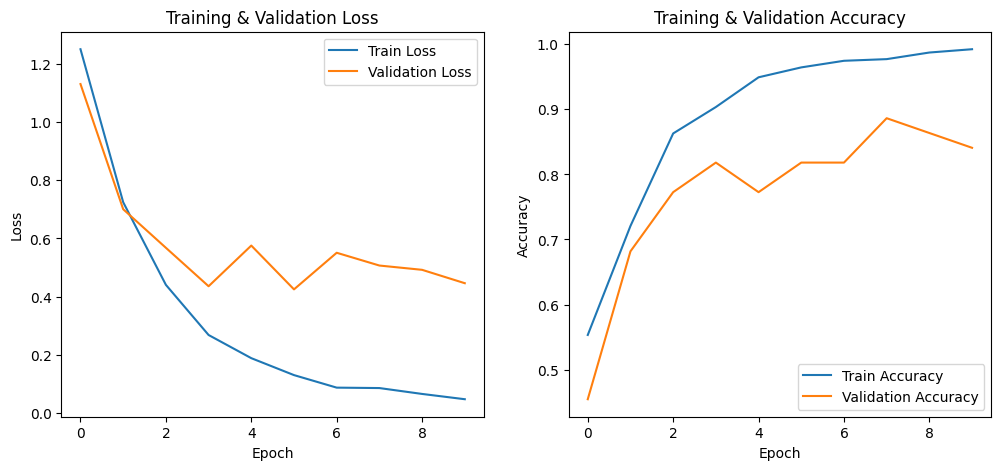

In [ ]:
import matplotlib.pyplot as plt

# Train the model and save history
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Total samples
total_samples = len(df_combined)
print(f"Total samples in dataset: {total_samples}")

# Samples per emotion class - counts and percentages
print("\nSamples per emotion class:")
emotion_counts = df_combined['emotion'].value_counts()
emotion_percent = df_combined['emotion'].value_counts(normalize=True) * 100
for emotion, count in emotion_counts.items():
    print(f" {emotion}: {count} ({emotion_percent[emotion]:.2f}%)")

# After splitting
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nNumber of training samples: {len(X_train)} ({(len(X_train) / total_samples) * 100:.2f}%)")
print(f"Number of testing samples: {len(X_test)} ({(len(X_test) / total_samples) * 100:.2f}%)")

# Decode one-hot back to class indices for train and test
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Get emotion labels from one_hot_labels columns
emotion_labels = [col.replace('emotion_', '') for col in one_hot_labels.columns]

# Training samples per class with percentage
print("\nTraining samples per class:")
for i, label in enumerate(emotion_labels):
    count = (y_train_classes == i).sum()
    percentage = (count / len(y_train)) * 100
    print(f" {label}: {count} ({percentage:.2f}%)")

# Testing samples per class with percentage
print("\nTesting samples per class:")
for i, label in enumerate(emotion_labels):
    count = (y_test_classes == i).sum()
    percentage = (count / len(y_test)) * 100
    print(f" {label}: {count} ({percentage:.2f}%)")


Total samples in dataset: 548

Samples per emotion class:
 happy: 137 (25.00%)
 sad: 137 (25.00%)
 angry: 137 (25.00%)
 fear: 137 (25.00%)

Number of training samples: 438 (79.93%)
Number of testing samples: 110 (20.07%)

Training samples per class:
 angry: 115 (26.26%)
 happy: 102 (23.29%)
 sad: 110 (25.11%)
 fear: 111 (25.34%)

Testing samples per class:
 angry: 22 (20.00%)
 happy: 35 (31.82%)
 sad: 27 (24.55%)
 fear: 26 (23.64%)


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Copy original DataFrame
df_combined = df_clean.copy()

# Step 2: Map emotions to sequential labels (0-3)
emotion_to_label = {'angry': 0, 'happy': 1, 'sad': 2, 'fear': 3}
df_combined['emotion_label'] = df_combined['emotion'].map(emotion_to_label)

# Step 3: One-hot encode emotions
all_columns = ['emotion_angry', 'emotion_happy', 'emotion_sad', 'emotion_fear']
one_hot_labels = pd.get_dummies(df_combined['emotion'], prefix='emotion').reindex(columns=all_columns, fill_value=0)
df_combined = pd.concat([df_combined, one_hot_labels], axis=1)

# Step 4: Reset index
df_combined.reset_index(drop=True, inplace=True)

# Step 5: Handle NaN in token_sequence
# Replace NaN with empty lists (so padding works)
df_combined['token_sequence'] = df_combined['token_sequence'].apply(lambda x: x if isinstance(x, list) else [])

# Step 6: Prepare features and labels for ML
X = pad_sequences(df_combined['token_sequence'], maxlen=20, padding='post', truncating='post')
y = one_hot_labels.values
df_combined['padded_sequence'] = X.tolist()

# Step 7: Reorder columns
desired_column_order = ['emotion', 'emotion_label', 'cleaned_text', 'token_sequence', 'padded_sequence'] + all_columns
df_combined = df_combined[desired_column_order]

# Step 8: Save cleaned & augmented DataFrame
df_combined.to_csv("final_augmented_emotions_onehot.csv", index=False)

# Step 9: Preview first few rows
print("\nSample cleaned & augmented data (consecutive indices):")
print(df_combined.head())

# Step 10: Sanity check preview
preview_df = pd.DataFrame({'emotion': ['angry', 'happy', 'sad', 'fear']})
preview_df['emotion_label'] = preview_df['emotion'].map(emotion_to_label)
one_hot_preview = pd.get_dummies(preview_df['emotion'], prefix='emotion').reindex(columns=all_columns, fill_value=0)
preview_df = pd.concat([preview_df, one_hot_preview], axis=1)
print("\nSanity check preview (0-3 label order):")
print(preview_df)



Sample cleaned & augmented data (consecutive indices):
  emotion  emotion_label                                       cleaned_text  \
0   happy              1  my boyfriend spoke with me yesterday for more ...   
1   happy              1                 when i eat and talk with my mother   
2   happy              1            when i remember my childhood experience   
3   happy              1                                        im so happy   
4   happy              1                 i am excited to see my exam result   

                                      token_sequence  \
0  [3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...   
1                      [8, 2, 234, 7, 93, 27, 3, 75]   
2                           [8, 2, 235, 3, 369, 370]   
3                                        [11, 4, 10]   
4                    [2, 23, 94, 6, 106, 3, 61, 145]   

                                     padded_sequence  emotion_angry  \
0  [3, 141, 142, 27, 5, 233, 18, 143, 144, 368, 2...         

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9479 - loss: 0.1961 - val_accuracy: 0.9318 - val_loss: 0.4026
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9741 - loss: 0.1344 - val_accuracy: 0.9318 - val_loss: 0.2017
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9717 - loss: 0.0946 - val_accuracy: 0.9318 - val_loss: 0.2125
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9967 - loss: 0.0383 - val_accuracy: 0.9318 - val_loss: 0.2047
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9939 - loss: 0.0456 - val_accuracy: 0.9318 - val_loss: 0.2077
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9992 - loss: 0.0198 - val_accuracy: 0.9318 - val_loss: 0.1885
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9888 - loss: 0.0267 - val_accuracy: 0.9318 - val_loss: 0.2923
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9905 - loss: 0.0213 - val_accuracy: 0.9318 - v

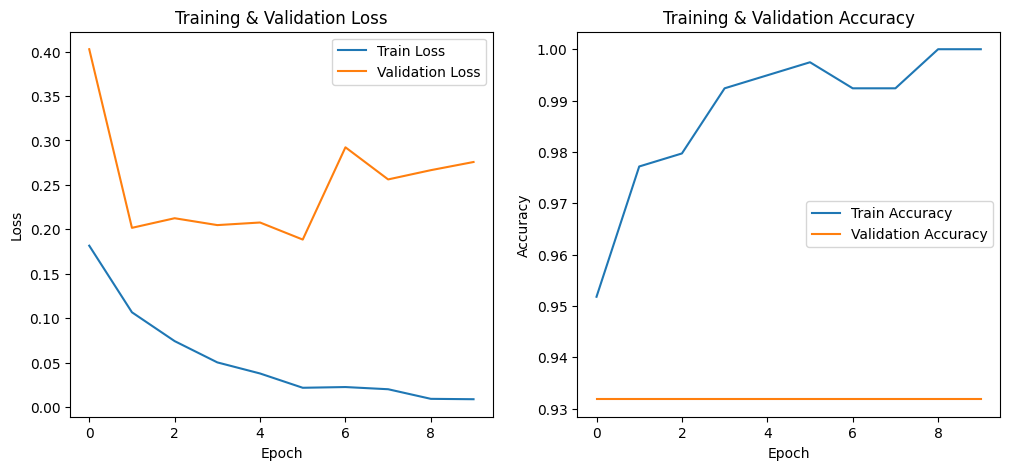

In [ ]:
import matplotlib.pyplot as plt

# Train the model and save history
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.3824 - loss: 1.3713 - val_accuracy: 0.4545 - val_loss: 1.2973
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4389 - loss: 1.2865 - val_accuracy: 0.5000 - val_loss: 1.1566
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5891 - loss: 1.1383 - val_accuracy: 0.6136 - val_loss: 0.9205
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5870 - loss: 0.9728 - val_accuracy: 0.6591 - val_loss: 0.8166
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5695 - loss: 0.8643 - val_accuracy: 0.6591 - val_loss: 0.7478
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6208 - loss: 0.8302 - val_accuracy: 0.7273 - val_loss: 0.7096
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.6846 - loss: 0.7175 - val_accuracy: 0.6818 - val_loss: 0.5942
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7386 - loss: 0.5972 - val_accuracy: 0.6818 - val_loss: 

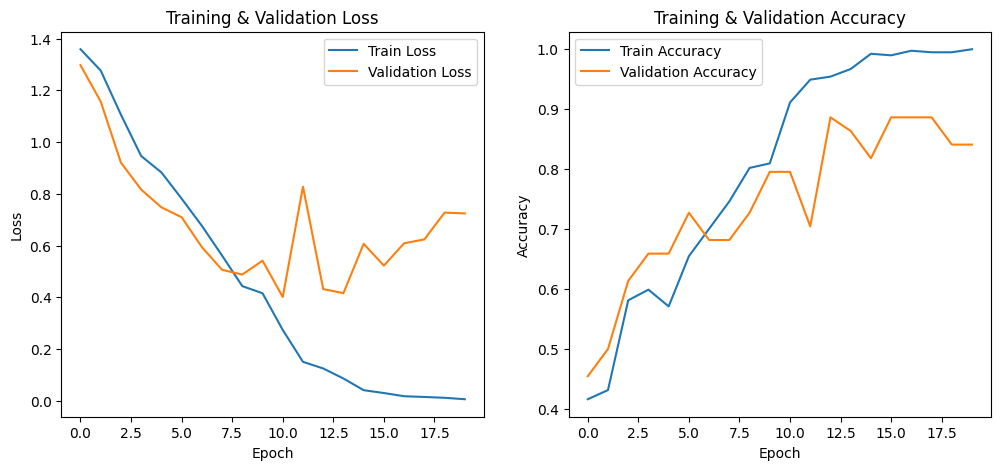

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,              # Increased epochs
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.3285 - loss: 1.3679 - val_accuracy: 0.4773 - val_loss: 1.2122
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4737 - loss: 1.1958 - val_accuracy: 0.4545 - val_loss: 0.9254
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6112 - loss: 0.9321 - val_accuracy: 0.7045 - val_loss: 0.7502
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6783 - loss: 0.7708 - val_accuracy: 0.7955 - val_loss: 0.6378
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7323 - loss: 0.6232 - val_accuracy: 0.7273 - val_loss: 0.5599
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8123 - loss: 0.4027 - val_accuracy: 0.7727 - val_loss: 0.6139
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8785 - loss: 0.3064 - val_accuracy: 0.8182 - val_loss: 0.4118
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9514 - loss: 0.1416 - val_accuracy: 0.8182 -

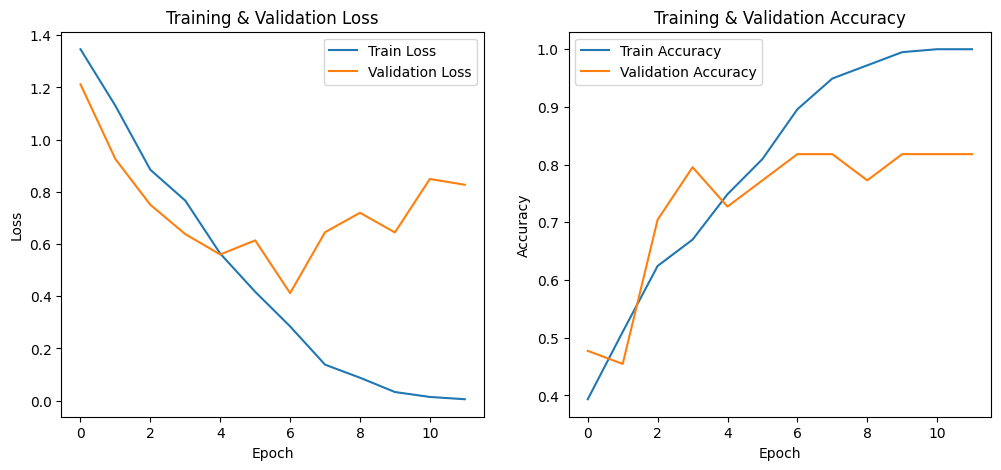

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with slightly higher learning rate for faster convergence
optimizer = Adam(learning_rate=0.001)  # Changed from 0.0005 → 0.001
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Early stopping callback
# ===============================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,         # Stop if validation loss doesn't improve for 5 epochs
    restore_best_weights=True
)

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=30,           # Increased epochs for convergence
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.3633 - loss: 1.3489 - val_accuracy: 0.5682 - val_loss: 1.1153
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5166 - loss: 1.0255 - val_accuracy: 0.5000 - val_loss: 0.8313
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6049 - loss: 0.8138 - val_accuracy: 0.5455 - val_loss: 0.7403
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7057 - loss: 0.7014 - val_accuracy: 0.7727 - val_loss: 0.5652
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8877 - loss: 0.4281 - val_accuracy: 0.7727 - val_loss: 0.5127
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9508 - loss: 0.1943 - val_accuracy: 0.8409 - val_loss: 0.3763
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9664 - loss: 0.0998 - val_accuracy: 0.8182 - val_loss: 0.5349
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9760 - loss: 0.0581 - val_accuracy: 0.7727 - v

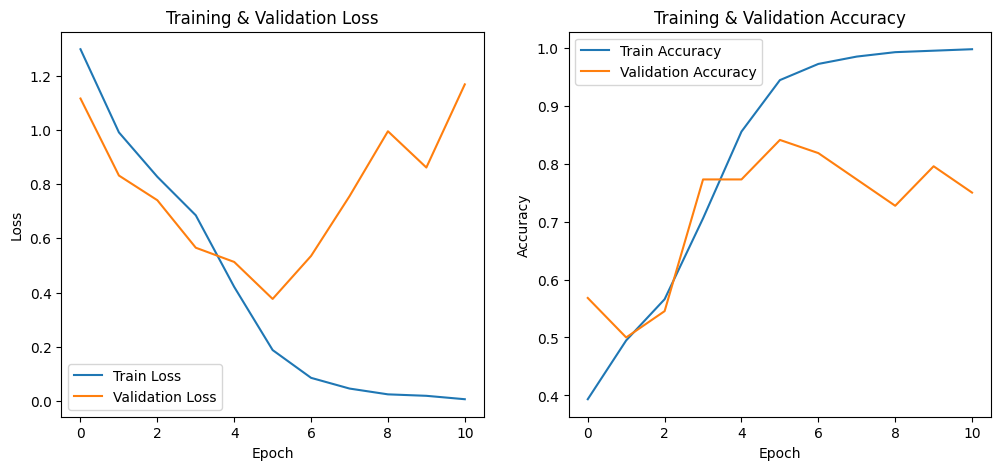

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with learning rate 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Early stopping callback
# ===============================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ===============================
# Train the Model with smaller batch size
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,       # Reduced batch size
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2832 - loss: 1.3622 - val_accuracy: 0.5227 - val_loss: 1.0900
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5419 - loss: 1.0075 - val_accuracy: 0.5682 - val_loss: 0.7670
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6392 - loss: 0.7322 - val_accuracy: 0.7727 - val_loss: 0.5765
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7854 - loss: 0.5133 - val_accuracy: 0.7273 - val_loss: 0.6375
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8040 - loss: 0.3861 - val_accuracy: 0.7955 - val_loss: 0.5212
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9316 - loss: 0.2043 - val_accuracy: 0.8409 - val_loss: 0.5728
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9878 - loss: 0.0607 - val_accuracy: 0.7727 - val_loss: 1.0190
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9738 - loss: 0.0914 - val_accuracy: 0.8182 - v

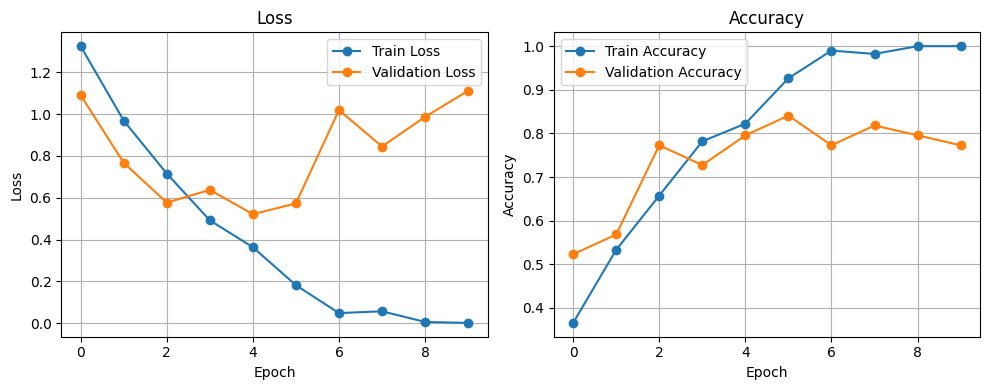

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with learning rate 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Early stopping callback
# ===============================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ===============================
# Train the Model with smaller batch size
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,       # Reduced batch size
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves (Compact)
# ===============================
plt.figure(figsize=(10,4))  # Reduced figure size

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust subplots to fit nicely
plt.show()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.3665 - loss: 1.3745 - val_accuracy: 0.4091 - val_loss: 1.2939
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4218 - loss: 1.2929 - val_accuracy: 0.5227 - val_loss: 1.1324
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5549 - loss: 1.1306 - val_accuracy: 0.6136 - val_loss: 0.9449
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5109 - loss: 0.9688 - val_accuracy: 0.4773 - val_loss: 0.8636
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5750 - loss: 0.8603 - val_accuracy: 0.5909 - val_loss: 0.7847
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6030 - loss: 0.7874 - val_accuracy: 0.7273 - val_loss: 0.6792
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7624 - loss: 0.6502 - val_accuracy: 0.7727 - val_loss: 0.6049
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8128 - loss: 0.4911 - val_accuracy: 0.6818 - val_loss: 0.9730

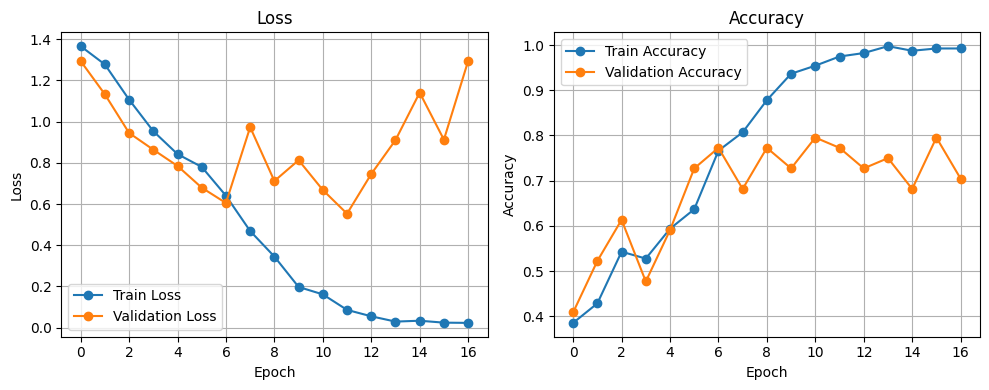

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with learning rate 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Early stopping callback
# ===============================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ===============================
# Train the Model with larger batch size
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,       # Increased batch size
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves (Compact)
# ===============================
plt.figure(figsize=(10,4))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.3009 - loss: 1.3841 - val_accuracy: 0.5455 - val_loss: 1.3773
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3949 - loss: 1.3751 - val_accuracy: 0.2727 - val_loss: 1.3683
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3574 - loss: 1.3654 - val_accuracy: 0.5682 - val_loss: 1.3556
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4970 - loss: 1.3507 - val_accuracy: 0.5682 - val_loss: 1.3398
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5141 - loss: 1.3333 - val_accuracy: 0.5682 - val_loss: 1.3169
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5149 - loss: 1.3107 - val_accuracy: 0.5682 - val_loss: 1.2829
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5125 - loss: 1.2735 - val_accuracy: 0.5000 - val_loss: 1.2372
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5080 - loss: 1.2283 - val_accuracy: 0.5000 - val_loss: 1.1764

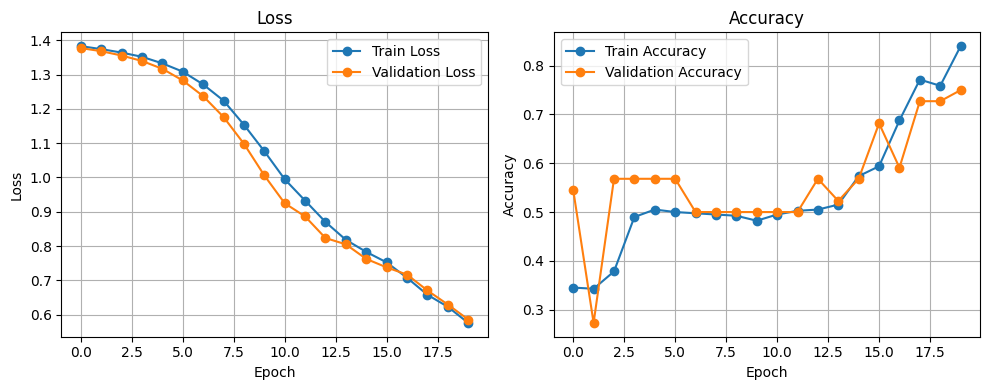

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Underfitting Model Definition
# ===============================
model = Sequential()
# Smaller embedding and LSTM units to reduce capacity
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=32, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dropout(0.2))  # Lower dropout
model.add(Dense(16, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with moderate learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overtraining
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ===============================
# Train the Model (fewer epochs)
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,           # Fewer epochs → underfit
    batch_size=64,       # Larger batch size → underfit effect
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(10,4))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.2009 - loss: 1.3872 - val_accuracy: 0.2955 - val_loss: 1.3853
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2656 - loss: 1.3857 - val_accuracy: 0.2727 - val_loss: 1.3845
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2482 - loss: 1.3862 - val_accuracy: 0.2727 - val_loss: 1.3846
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2335 - loss: 1.3858 - val_accuracy: 0.2727 - val_loss: 1.3844
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2840 - loss: 1.3848 - val_accuracy: 0.2727 - val_loss: 1.3847
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2681 - loss: 1.3847 - val_accuracy: 0.4318 - val_loss: 1.3839
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3482 - loss: 1.3833 - val_accuracy: 0.5455 - val_loss: 1.3829
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3716 - loss: 1.3842 - val_accuracy: 0.4773 - val_loss: 1.3839

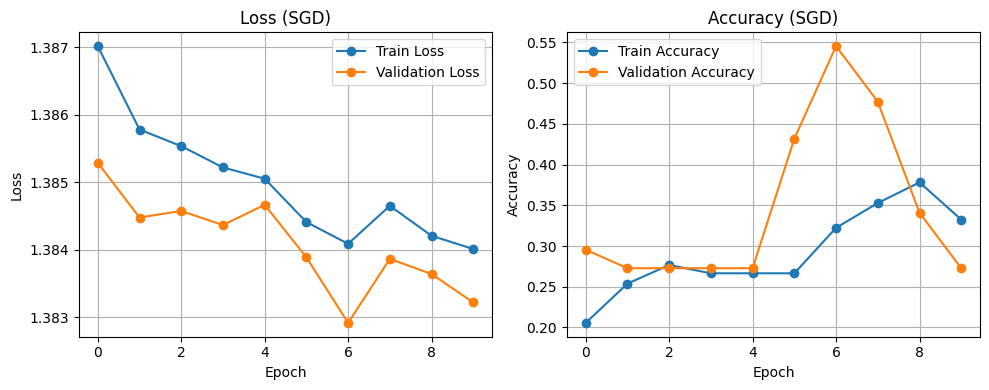

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition (small model for underfit)
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=32, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with SGD optimizer (slower learning → underfitting effect)
optimizer = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overtraining
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,           # Short training to simulate underfit
    batch_size=64,       # Large batch size
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(10,4))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2159 - loss: 1.3867 - val_accuracy: 0.1818 - val_loss: 1.3881
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1932 - loss: 1.3861 - val_accuracy: 0.3182 - val_loss: 1.3858
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2903 - loss: 1.3824 - val_accuracy: 0.3864 - val_loss: 1.3851
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3401 - loss: 1.3837 - val_accuracy: 0.4318 - val_loss: 1.3841
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3377 - loss: 1.3823 - val_accuracy: 0.4318 - val_loss: 1.3821
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4476 - loss: 1.3787 - val_accuracy: 0.4545 - val_loss: 1.3809
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4311 - loss: 1.3788 - val_accuracy: 0.4773 - val_loss: 1.3786
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4868 - loss: 1.3767 - val_accuracy: 0.4545 - v

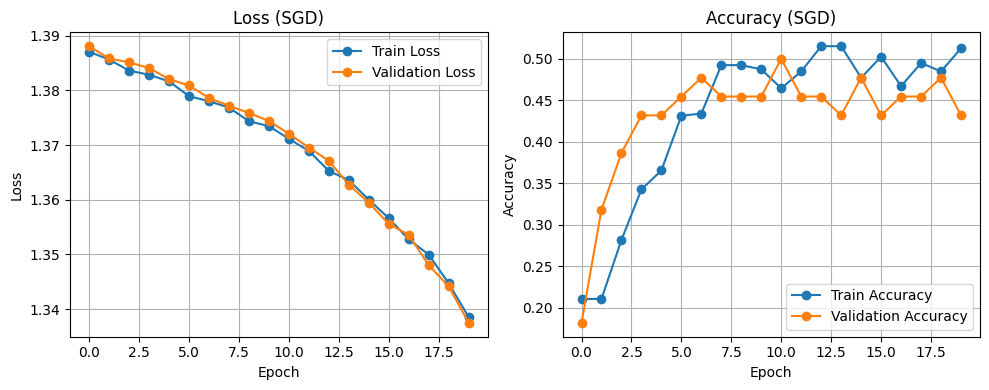

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition (small model for underfit)
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=32, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with SGD optimizer (slower learning → underfitting effect)
optimizer = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overtraining
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,           # Short training to simulate underfit
    batch_size=16,       # small batch size
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(10,4))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.2639 - loss: 1.3825 - val_accuracy: 0.3409 - val_loss: 1.3325
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3130 - loss: 1.3266 - val_accuracy: 0.4091 - val_loss: 1.2003
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4691 - loss: 1.1900 - val_accuracy: 0.4545 - val_loss: 1.0604
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4973 - loss: 1.0804 - val_accuracy: 0.5455 - val_loss: 0.9381
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4961 - loss: 0.9581 - val_accuracy: 0.6136 - val_loss: 0.8184
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6118 - loss: 0.8145 - val_accuracy: 0.6364 - val_loss: 0.6952
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7451 - loss: 0.6570 - val_accuracy: 0.6591 - val_loss: 0.6163
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7879 - loss: 0.5099 - val_accuracy: 0.6818 - 

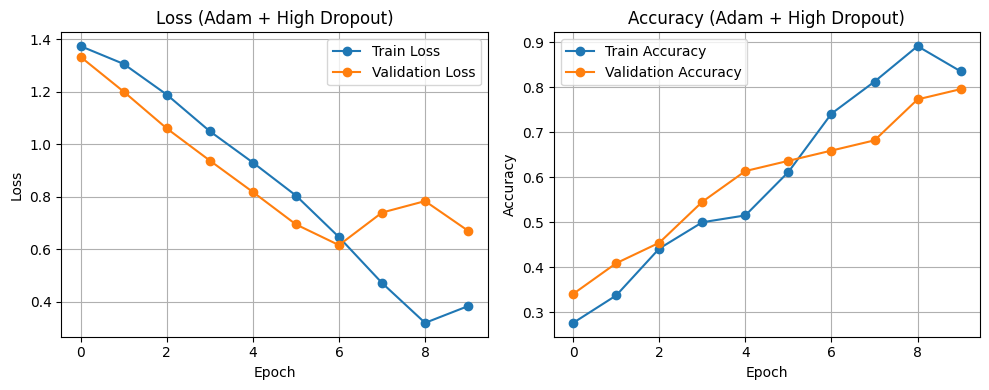

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ===============================
# Model Definition (Adam + higher dropout for underfitting)
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=64, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.7))  # High dropout to reduce fitting ability
model.add(Dense(32, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(10,4))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss (Adam + High Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy (Adam + High Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
=== Test Metrics ===
Test Loss       : 0.7273
Test Accuracy   : 0.6182
Accuracy        : 0.6182
Precision       : 0.6676
Recall          : 0.6182
F1-Score        : 0.6119

=== Training Metrics ===
Final Training Loss    : 0.3842
Final Training Accuracy: 0.835
Final Validation Loss  : 0.6708
Final Validation Accuracy: 0.7955


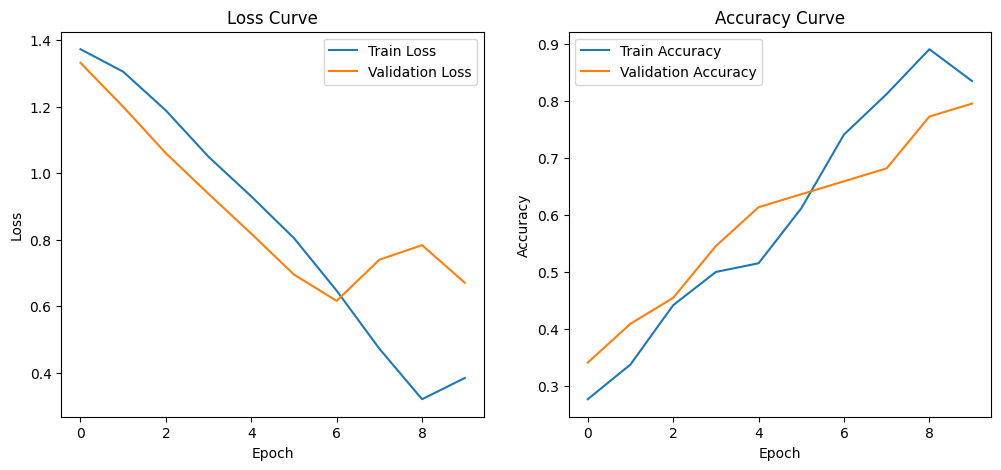

In [ ]:
# ================================
# Imports
# ================================
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ================================
# Predict on test data
# ================================
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# ================================
# Compute Test Metrics
# ================================
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)

# Loss and Accuracy on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# ================================
# Print Metrics
# ================================
print("=== Test Metrics ===")
print("Test Loss       :", round(test_loss, 4))
print("Test Accuracy   :", round(test_accuracy, 4))
print("Accuracy        :", round(accuracy, 4))
print("Precision       :", round(precision, 4))
print("Recall          :", round(recall, 4))
print("F1-Score        :", round(f1, 4))

# ================================
# Training Metrics from history
# ================================
print("\n=== Training Metrics ===")
print("Final Training Loss    :", round(history.history['loss'][-1], 4))
print("Final Training Accuracy:", round(history.history['accuracy'][-1], 4))
print("Final Validation Loss  :", round(history.history['val_loss'][-1], 4))
print("Final Validation Accuracy:", round(history.history['val_accuracy'][-1], 4))

# ================================
# Optional: Plot Training vs Validation Curves
# ================================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# -----------------------------
# Assume binary classification: 1 = Positive, 0 = Negative
# If multi-class, you can map your labels to positive/negative first
# -----------------------------
# Example: using 'happy' and 'sad' as Positive, 'angry' and 'fear' as Negative
positive_classes = [1]  # adjust based on your mapping
negative_classes = [0]  # adjust based on your mapping

# Predict classes
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Map to binary
y_true_binary = np.where(y_true_classes == 1, 1, 0)  # Positive=1, Negative=0
y_pred_binary = np.where(y_pred_classes == 1, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Convert to DataFrame
cm_df = pd.DataFrame(
    cm,
    index=["Actual Positive", "Actual Negative"],
    columns=["Predicted Positive", "Predicted Negative"]
)

print("\nBinary Confusion Matrix:")
print(cm_df)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Binary Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                  63                  12
Actual Negative                  26                   9


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


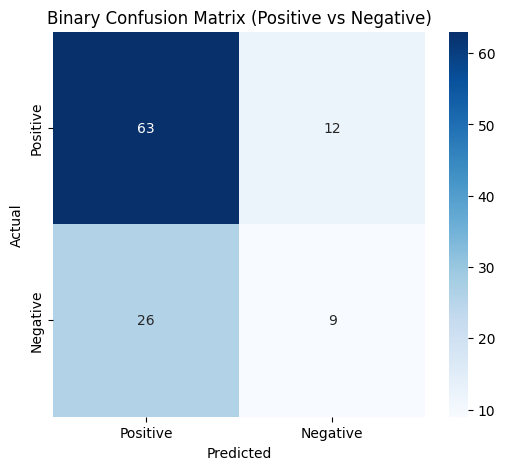

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -----------------------------
# Map multi-class to binary
# Example: 'happy' (1) = Positive, others = Negative
# Adjust this mapping based on your requirement
# -----------------------------
positive_classes = [1]  # example: happy class
negative_classes = [0, 2, 3]  # angry, sad, fear

# Predicted classes
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Map to binary
y_true_binary = np.where(np.isin(y_true_classes, positive_classes), 1, 0)
y_pred_binary = np.where(np.isin(y_pred_classes, positive_classes), 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Labels for the binary table
labels = ["Positive", "Negative"]

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix (Positive vs Negative)")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Multi-class Confusion Matrix:

              Predicted angry  Predicted happy  Predicted sad  Predicted fear
Actual angry               18                3              1               0
Actual happy               25                9              1               0
Actual sad                  3                9             15               0
Actual fear                 0                0              0              26

Classification Report:

              precision    recall  f1-score   support

       angry       0.39      0.82      0.53        22
       happy       0.43      0.26      0.32        35
         sad       0.88      0.56      0.68        27
        fear       1.00      1.00      1.00        26

    accuracy                           0.62       110
   macro avg       0.68      0.66      0.63       110
weighted avg       0.67      0.62      0.61       110



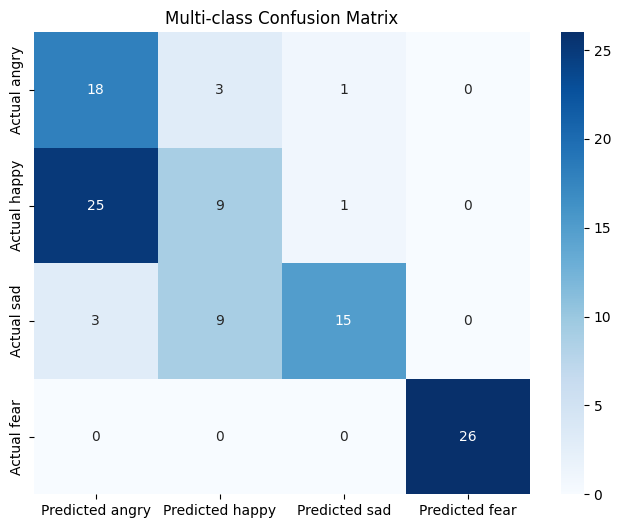

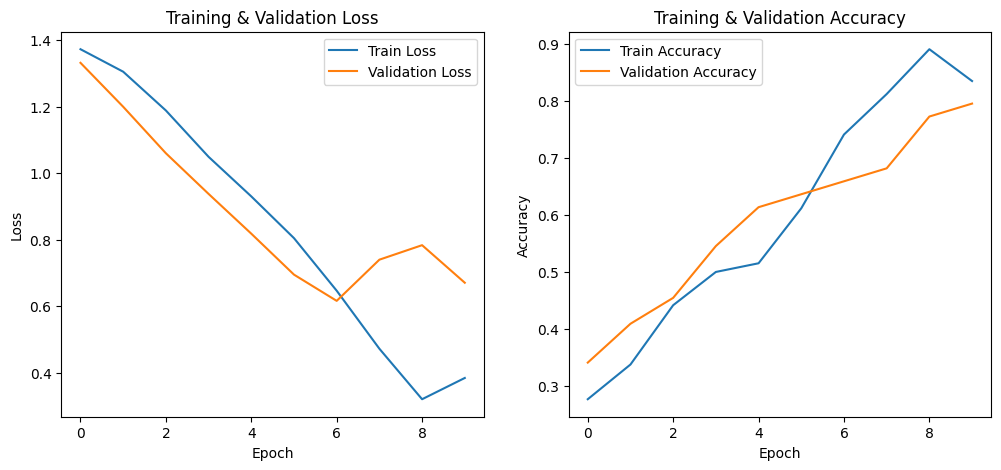

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------------
# Predict classes on X_test
# -------------------------------
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# -------------------------------
# Define emotion labels
# -------------------------------
emotion_labels = ['angry', 'happy', 'sad', 'fear']

# -------------------------------
# Multi-class Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_df = pd.DataFrame(cm, index=[f'Actual {e}' for e in emotion_labels],
                     columns=[f'Predicted {e}' for e in emotion_labels])

print("Multi-class Confusion Matrix:\n")
print(cm_df)

# -------------------------------
# Classification Report (Precision, Recall, F1)
# -------------------------------
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels))

# -------------------------------
# Plot Heatmap of Confusion Matrix
# -------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Multi-class Confusion Matrix')
plt.show()

# -------------------------------
# Training History Visualization
# -------------------------------
history_dict = model.history.history  # Make sure model was trained with history object
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.3094 - loss: 1.3823 - val_accuracy: 0.4773 - val_loss: 1.3748
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.4323 - loss: 1.3754 - val_accuracy: 0.4545 - val_loss: 1.3637
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4698 - loss: 1.3651 - val_accuracy: 0.4773 - val_loss: 1.3501
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.4439 - loss: 1.3591 - val_accuracy: 0.4773 - val_loss: 1.3341
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4618 - loss: 1.3414 - val_accuracy: 0.4773 - val_loss: 1.3093
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4863 - loss: 1.3125 - val_accuracy: 0.4773 - val_loss: 1.2710
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5034 - loss: 1.2765 - val_accuracy: 0.4545 - val_loss: 1.2160
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5170 - loss: 1.2183 - val_accuracy: 0.4545 - val_loss:

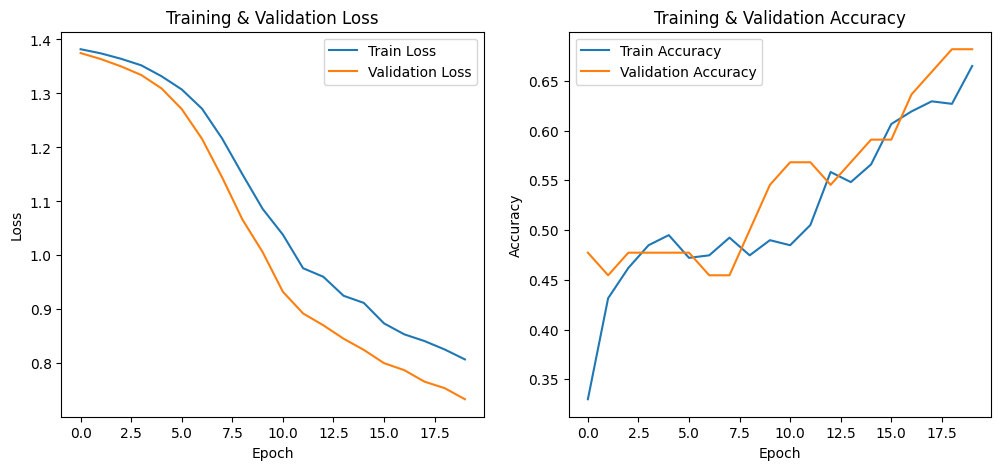

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with **lower learning rate**
optimizer = Adam(learning_rate=0.0001)  # decreased from 0.0005
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.2377 - loss: 1.3822 - val_accuracy: 0.3409 - val_loss: 1.3410
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4017 - loss: 1.3293 - val_accuracy: 0.3864 - val_loss: 1.2421
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5152 - loss: 1.2284 - val_accuracy: 0.5909 - val_loss: 1.0408
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5316 - loss: 1.0458 - val_accuracy: 0.6818 - val_loss: 0.8708
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5475 - loss: 0.9088 - val_accuracy: 0.7045 - val_loss: 0.7647
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6543 - loss: 0.8342 - val_accuracy: 0.7045 - val_loss: 0.7308
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6841 - loss: 0.7315 - val_accuracy: 0.7045 - val_loss: 0.6368
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7026 - loss: 0.6447 - val_accuracy: 0.7045 -

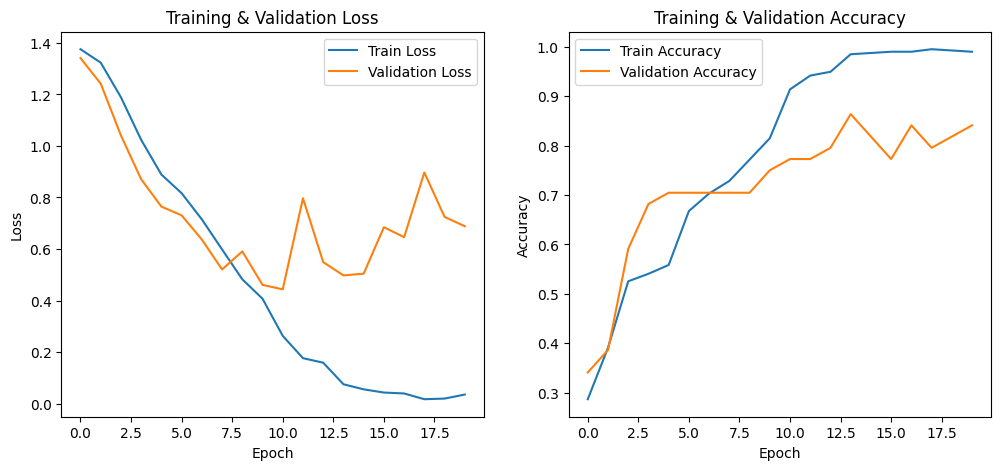

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with **lower learning rate**
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.2864 - loss: 1.3678 - val_accuracy: 0.4318 - val_loss: 1.2010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3807 - loss: 1.1865 - val_accuracy: 0.5455 - val_loss: 0.9418
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4817 - loss: 0.9484 - val_accuracy: 0.5909 - val_loss: 0.7496
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6123 - loss: 0.8344 - val_accuracy: 0.6136 - val_loss: 0.6952
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6461 - loss: 0.7630 - val_accuracy: 0.7273 - val_loss: 0.5925
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7780 - loss: 0.5492 - val_accuracy: 0.7500 - val_loss: 0.5129
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.8063 - loss: 0.4259 - val_accuracy: 0.7727 - val_loss: 0.6737
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8977 - loss: 0.2582 - val_accuracy: 0.8409 -

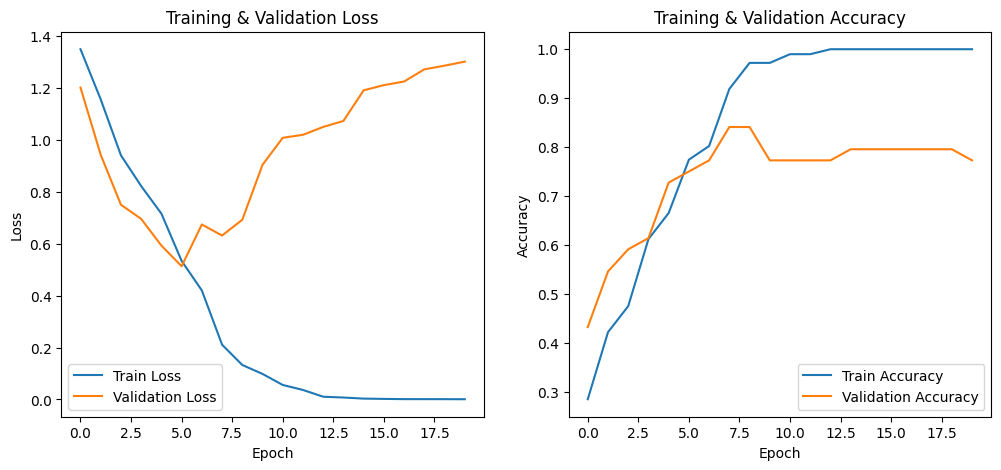

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with **higher learning rate**
optimizer = Adam(learning_rate=0.001)  # increased from 0.0005
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



🔹 Training with batch size = 32

🔹 Training with batch size = 16

🔹 Training with batch size = 8


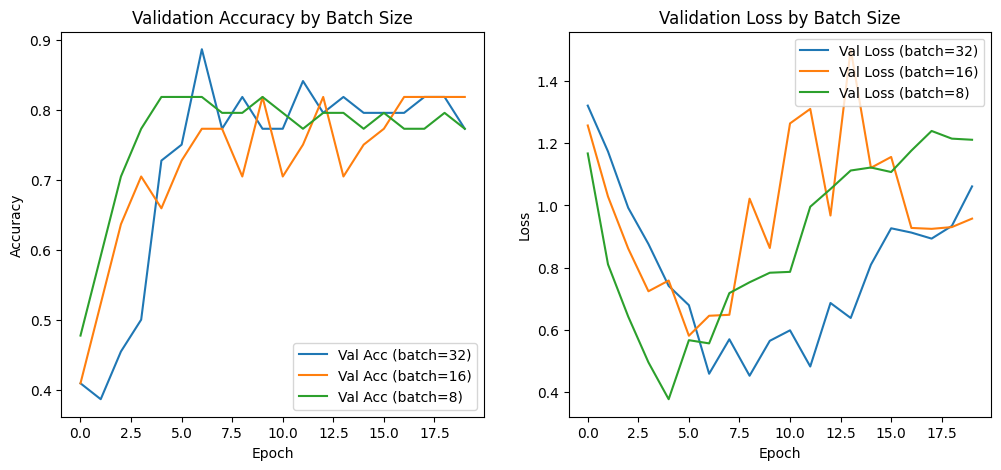

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

def build_model():
    model = Sequential()
    model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(128, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(all_emotions), activation='softmax'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ===============================
# Train with Different Batch Sizes
# ===============================
batch_sizes = [32, 16, 8]
histories = {}

for b in batch_sizes:
    print(f"\n🔹 Training with batch size = {b}")
    model = build_model()
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=b,
        validation_split=0.1,
        shuffle=True,
        verbose=0   # suppress per-epoch output for cleaner logs
    )
    histories[b] = history

# ===============================
# Plot Training & Validation Accuracy
# ===============================
plt.figure(figsize=(12,5))

# Accuracy comparison
plt.subplot(1,2,1)
for b, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Val Acc (batch={b})')
plt.title('Validation Accuracy by Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1,2,2)
for b, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Val Loss (batch={b})')
plt.title('Validation Loss by Batch Size')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.2058 - loss: 1.3862 - val_accuracy: 0.2500 - val_loss: 1.3880
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4151 - loss: 1.3692 - val_accuracy: 0.2500 - val_loss: 1.3954
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3816 - loss: 1.3363 - val_accuracy: 0.2500 - val_loss: 1.3914
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6097 - loss: 1.1400 - val_accuracy: 0.2000 - val_loss: 1.3696
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8613 - loss: 0.5014 - val_accuracy: 0.2500 - val_loss: 2.3047
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9454 - loss: 0.1868 - val_accuracy: 0.2000 - val_loss: 2.6274
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9938 - loss: 0.0280 - val_accuracy: 0.2000 - val_loss: 2.9568
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.2500 - v

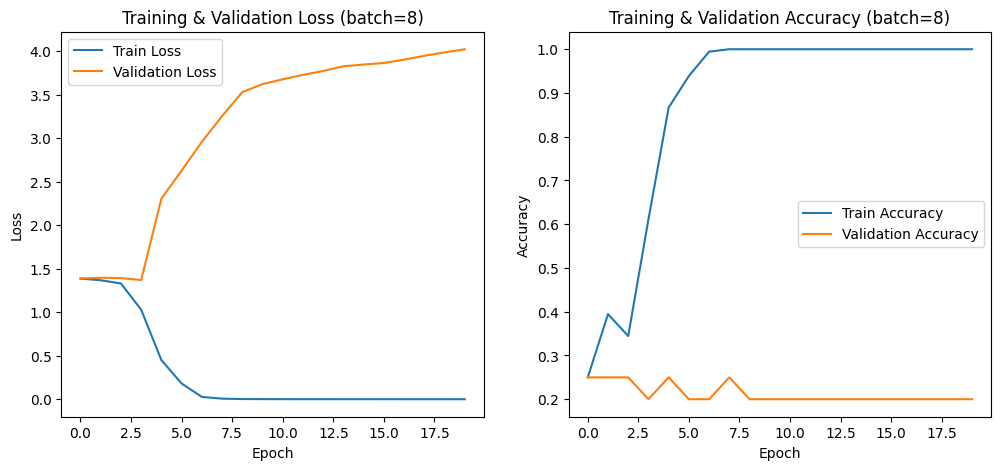

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define parameters
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
all_emotions = ['angry', 'happy', 'sad', 'fear']

# ============================================
# Dummy Data (replace with your preprocessed data)
# ============================================
# Example: 200 samples, each with MAX_SEQUENCE_LENGTH words
X_train = np.random.randint(1, MAX_NUM_WORDS, size=(200, MAX_SEQUENCE_LENGTH))

# Example: categorical labels for 4 emotions
y_train = np.random.randint(0, len(all_emotions), size=(200,))
y_train = to_categorical(y_train, num_classes=len(all_emotions))

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with batch size = 8
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,   # 🔹 smaller batch size
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (batch=8)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (batch=8)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.2561 - loss: 1.3862 - val_accuracy: 0.1500 - val_loss: 1.3901
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3967 - loss: 1.3741 - val_accuracy: 0.1500 - val_loss: 1.3915
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6003 - loss: 1.3602 - val_accuracy: 0.1000 - val_loss: 1.3950
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7139 - loss: 1.3251 - val_accuracy: 0.0000e+00 - val_loss: 1.4051
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7877 - loss: 1.2028 - val_accuracy: 0.0500 - val_loss: 1.5295
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7903 - loss: 0.7646 - val_accuracy: 0.1500 - val_loss: 3.4983
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8749 - loss: 0.3083 - val_accuracy: 0.4000 - val_loss: 3.5610
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9667 - loss: 0.1128 - val_accuracy: 0.2500

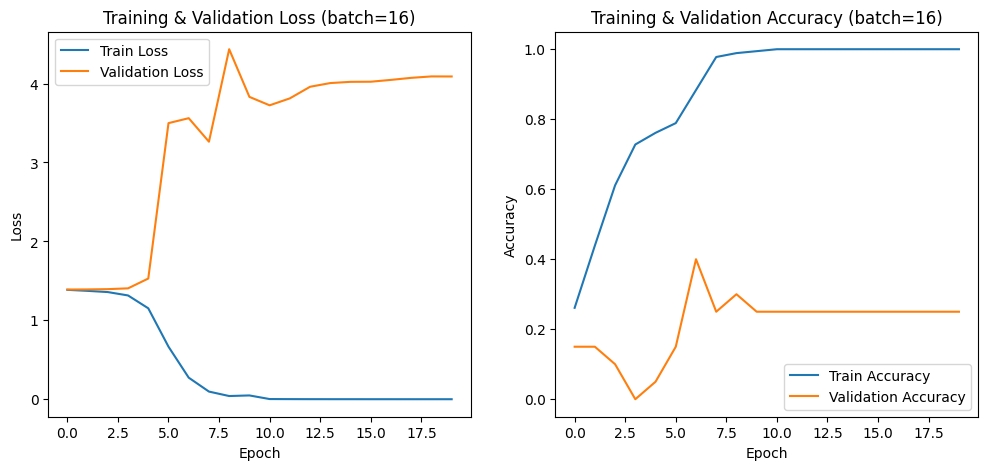

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with batch size = 16
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,   # 🔹 updated batch size
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (batch=16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (batch=16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.1686 - loss: 1.3895 - val_accuracy: 0.1000 - val_loss: 1.3902
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3861 - loss: 1.3799 - val_accuracy: 0.1500 - val_loss: 1.3913
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5658 - loss: 1.3715 - val_accuracy: 0.1500 - val_loss: 1.3921
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6882 - loss: 1.3604 - val_accuracy: 0.1500 - val_loss: 1.3928
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7869 - loss: 1.3429 - val_accuracy: 0.2000 - val_loss: 1.3956
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8768 - loss: 1.3116 - val_accuracy: 0.2000 - val_loss: 1.4021
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9060 - loss: 1.2517 - val_accuracy: 0.1000 - val_loss: 1.4075
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 1.0000 - loss: 1.1149 - val_accuracy: 0.1500 - val_loss: 1.4597

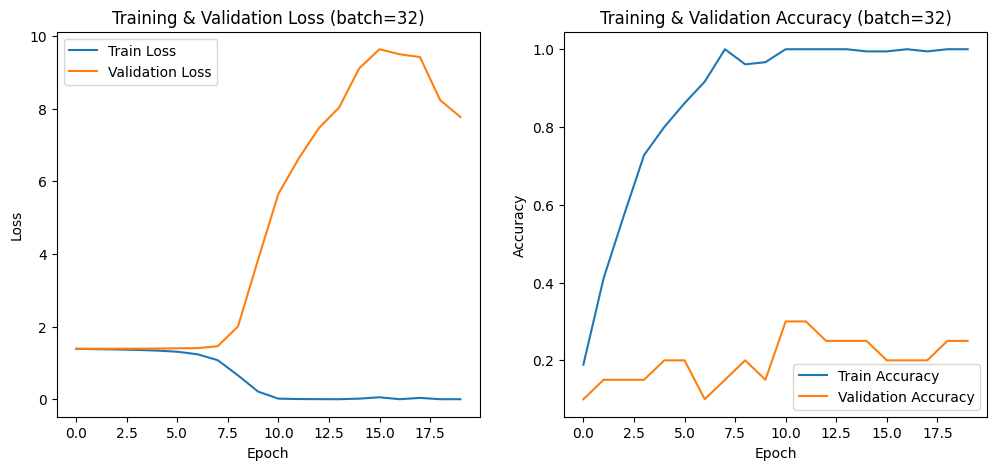

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with batch size = 32
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,   # 🔹 updated batch size
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (batch=32)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (batch=32)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.2427 - loss: 1.3867 - val_accuracy: 0.3000 - val_loss: 1.3860
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4421 - loss: 1.3790 - val_accuracy: 0.3000 - val_loss: 1.3862
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.4939 - loss: 1.3751 - val_accuracy: 0.3000 - val_loss: 1.3867
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5632 - loss: 1.3693 - val_accuracy: 0.3000 - val_loss: 1.3876
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6096 - loss: 1.3600 - val_accuracy: 0.2500 - val_loss: 1.3886
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.6517 - loss: 1.3476 - val_accuracy: 0.2500 - val_loss: 1.3886
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6944 - loss: 1.3328 - val_accuracy: 0.2500 - val_loss: 1.3895
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7441 - loss: 1.3152 - val_accuracy: 0.3000 - val_loss:

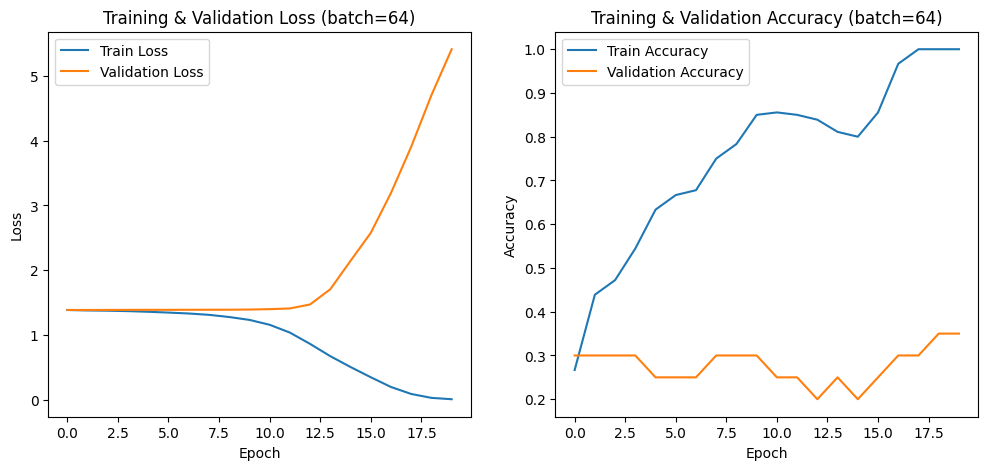

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with batch size = 64
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,   # 🔹 updated batch size
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (batch=64)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (batch=64)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.2475 - loss: 1.3862 - val_accuracy: 0.2500 - val_loss: 1.3870
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.4217 - loss: 1.3803 - val_accuracy: 0.1500 - val_loss: 1.3869
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5152 - loss: 1.3754 - val_accuracy: 0.2000 - val_loss: 1.3867
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6119 - loss: 1.3673 - val_accuracy: 0.2500 - val_loss: 1.3868
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6267 - loss: 1.3588 - val_accuracy: 0.3000 - val_loss: 1.3874
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6166 - loss: 1.3506 - val_accuracy: 0.3000 - val_loss: 1.3879
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7038 - loss: 1.3295 - val_accuracy: 0.3000 - val_loss: 1.3886
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7135 - loss: 1.3119 - val_accuracy: 0.3000 - val_loss:

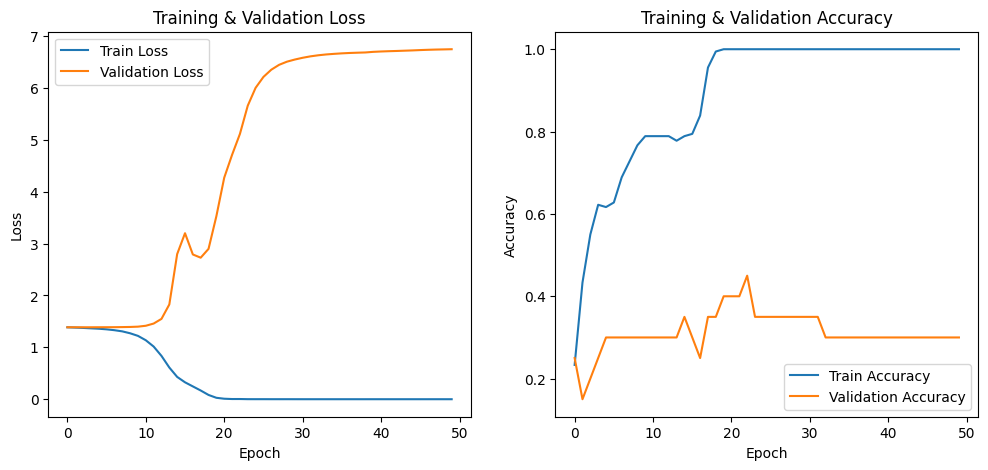

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with increased epochs
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=50,      # 🔹 increased number of epochs
    batch_size=64,  # or any batch size you want
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.3171 - loss: 1.3845 - val_accuracy: 0.3500 - val_loss: 1.3858
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.2965 - loss: 1.3851 - val_accuracy: 0.3000 - val_loss: 1.3860
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.3179 - loss: 1.3834 - val_accuracy: 0.3000 - val_loss: 1.3862
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3304 - loss: 1.3829 - val_accuracy: 0.3000 - val_loss: 1.3865
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4076 - loss: 1.3818 - val_accuracy: 0.2500 - val_loss: 1.3867
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4095 - loss: 1.3805 - val_accuracy: 0.2000 - val_loss: 1.3868
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4079 - loss: 1.3800 - val_accuracy: 0.2000 - val_loss: 1.3870
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.4276 - loss: 1.3789 - val_accuracy: 0.2000 - val_loss:

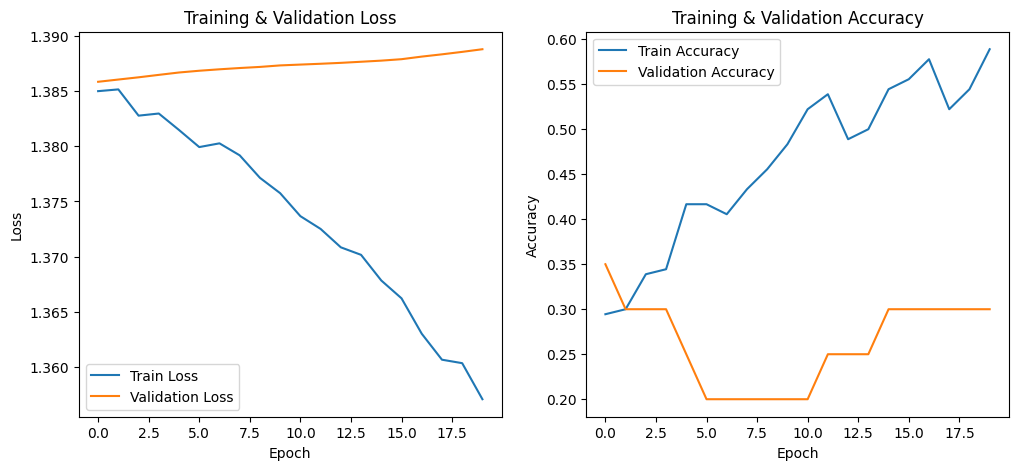

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with increased epochs
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,  # or any batch size you want
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.2397 - loss: 1.3865 - val_accuracy: 0.1500 - val_loss: 1.3874
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2530 - loss: 1.3847 - val_accuracy: 0.1000 - val_loss: 1.3875
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.2516 - loss: 1.3854 - val_accuracy: 0.1000 - val_loss: 1.3875
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4018 - loss: 1.3820 - val_accuracy: 0.1000 - val_loss: 1.3876
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.3477 - loss: 1.3822 - val_accuracy: 0.1000 - val_loss: 1.3877


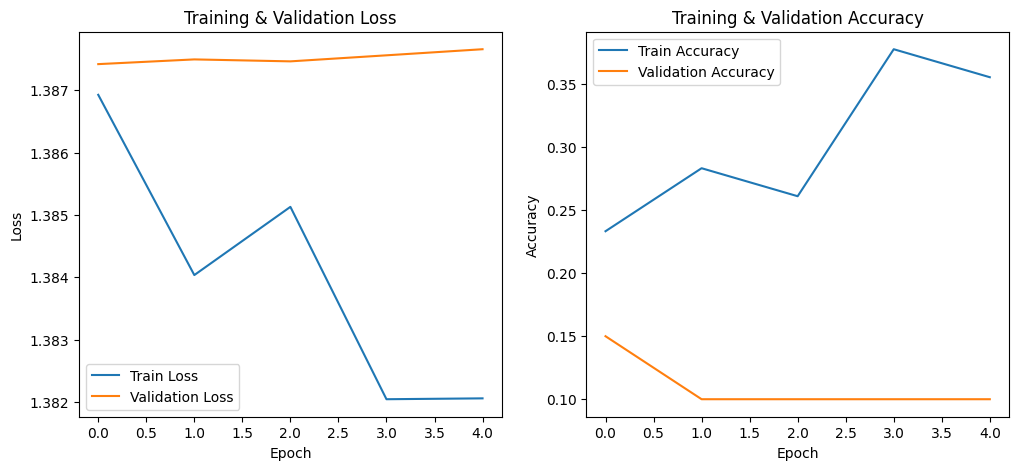

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with increased epochs
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,  # or any batch size you want
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.2495 - loss: 1.3858 - val_accuracy: 0.2000 - val_loss: 1.3862
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3059 - loss: 1.3850 - val_accuracy: 0.2500 - val_loss: 1.3866
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.3388 - loss: 1.3832 - val_accuracy: 0.1500 - val_loss: 1.3870
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4234 - loss: 1.3819 - val_accuracy: 0.1500 - val_loss: 1.3873
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.4488 - loss: 1.3808 - val_accuracy: 0.1500 - val_loss: 1.3877
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.4899 - loss: 1.3792 - val_accuracy: 0.1500 - val_loss: 1.3881
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5300 - loss: 1.3771 - val_accuracy: 0.1500 - val_loss: 1.3884
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5649 - loss: 1.3754 - val_accuracy: 0.2000 - val_loss

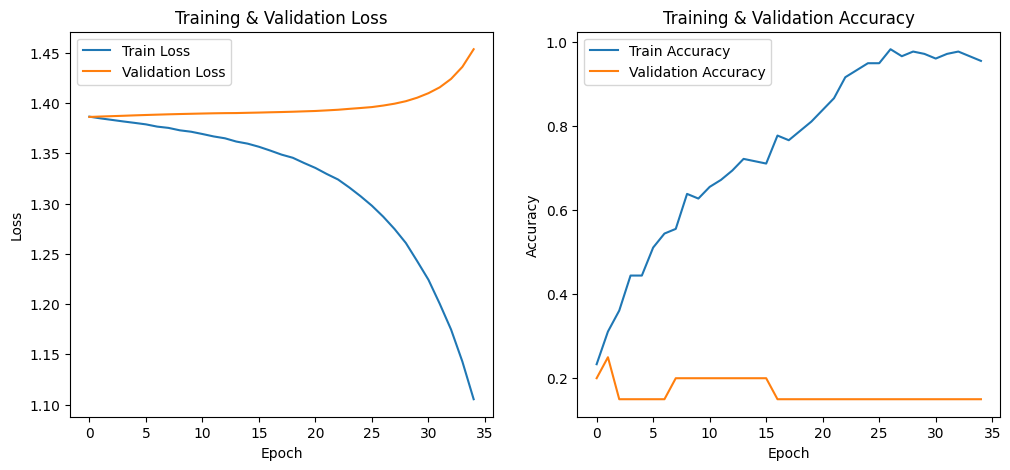

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with increased epochs
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,  # or any batch size you want
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.2422 - loss: 1.3854 - val_accuracy: 0.2500 - val_loss: 1.3884
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2321 - loss: 1.3857 - val_accuracy: 0.2500 - val_loss: 1.3885
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.2686 - loss: 1.3845 - val_accuracy: 0.2500 - val_loss: 1.3885
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.2859 - loss: 1.3841 - val_accuracy: 0.2500 - val_loss: 1.3886
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.3488 - loss: 1.3814 - val_accuracy: 0.3000 - val_loss: 1.3887
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3542 - loss: 1.3811 - val_accuracy: 0.2500 - val_loss: 1.3888
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3340 - loss: 1.3807 - val_accuracy: 0.2500 - val_loss: 1.3889
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3580 - loss: 1.3797 - val_accuracy: 0.2500 - val_loss:

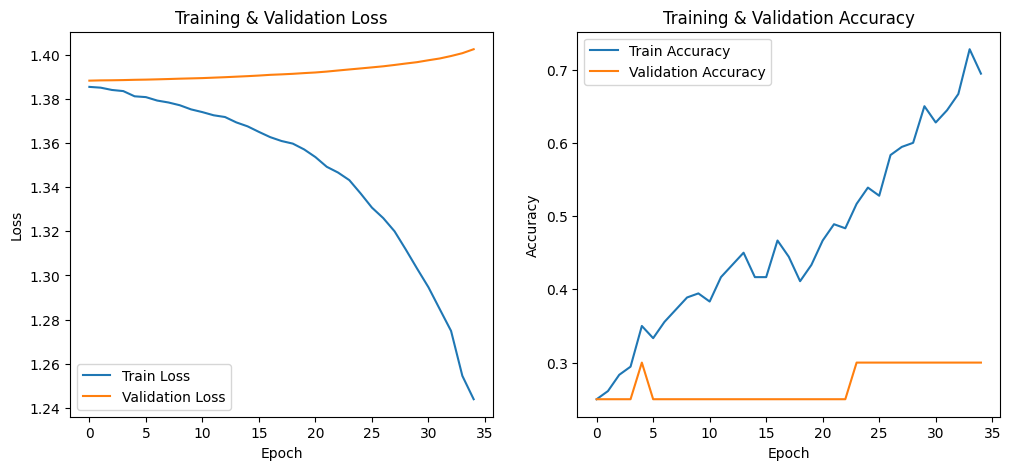

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with increased epochs
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,  # or any batch size you want
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.2342 - loss: 1.3876 - val_accuracy: 0.2000 - val_loss: 1.3877
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2848 - loss: 1.3858 - val_accuracy: 0.1500 - val_loss: 1.3878
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2388 - loss: 1.3863 - val_accuracy: 0.1500 - val_loss: 1.3879
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.2575 - loss: 1.3847 - val_accuracy: 0.2000 - val_loss: 1.3880
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2614 - loss: 1.3848 - val_accuracy: 0.2000 - val_loss: 1.3881
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.2957 - loss: 1.3820 - val_accuracy: 0.2000 - val_loss: 1.3882
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2968 - loss: 1.3826 - val_accuracy: 0.2000 - val_loss: 1.3883
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.3274 - loss: 1.3818 - val_accuracy: 0.2000 - val_loss:

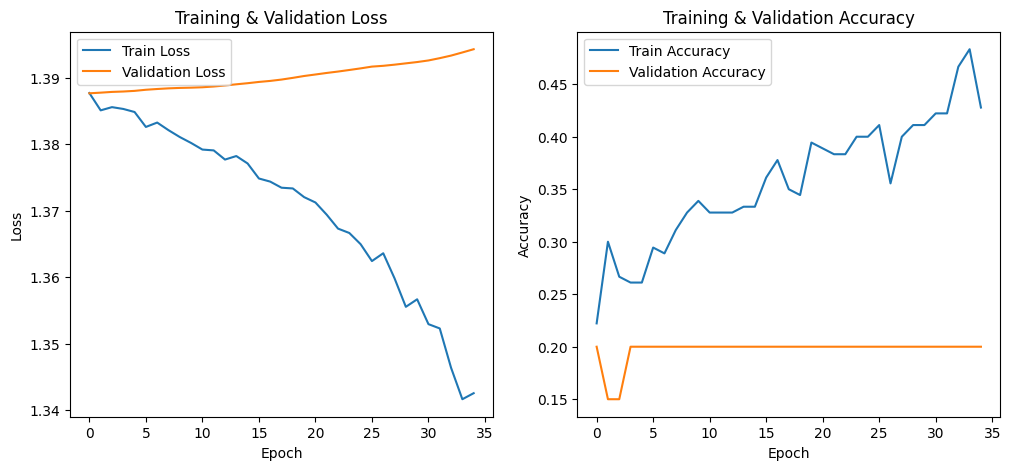

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model with increased epochs
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,  # or any batch size you want
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 847ms/step - accuracy: 0.2842 - loss: 1.3852 - val_accuracy: 0.1000 - val_loss: 1.3873
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.2313 - loss: 1.3853 - val_accuracy: 0.1000 - val_loss: 1.3873
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.3560 - loss: 1.3842 - val_accuracy: 0.1000 - val_loss: 1.3874
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.2839 - loss: 1.3847 - val_accuracy: 0.1000 - val_loss: 1.3874
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3263 - loss: 1.3843 - val_accuracy: 0.1000 - val_loss: 1.3874
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.3692 - loss: 1.3831 - val_accuracy: 0.1000 - val_loss: 1.3874
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3987 - loss: 1.3826 - val_accuracy: 0.1000 - val_loss: 1.3874
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.3948 - loss: 1.3827 - val_accuracy: 0.1000 - val_loss: 

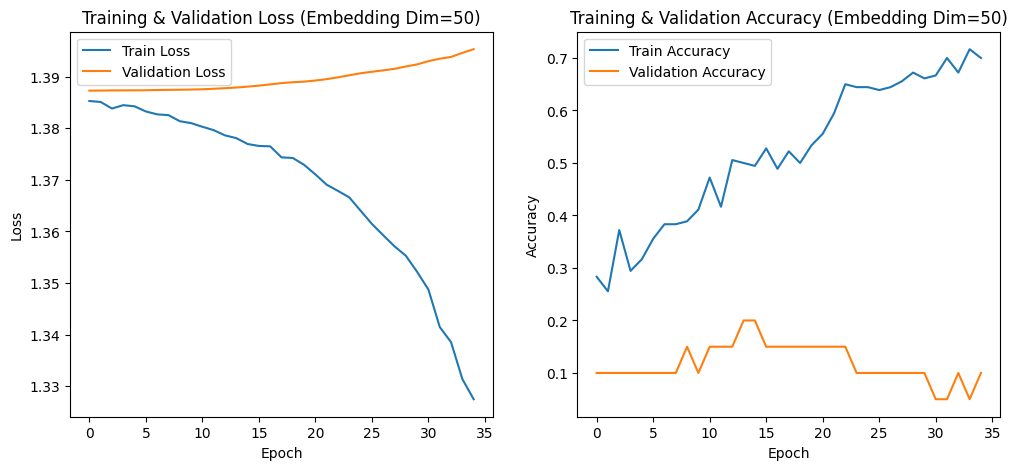

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=50, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (Embedding Dim=50)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (Embedding Dim=50)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.2489 - loss: 1.3855 - val_accuracy: 0.2500 - val_loss: 1.3875
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.1912 - loss: 1.3863 - val_accuracy: 0.3000 - val_loss: 1.3875
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.3126 - loss: 1.3855 - val_accuracy: 0.3500 - val_loss: 1.3876
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.2906 - loss: 1.3841 - val_accuracy: 0.3500 - val_loss: 1.3876
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.3480 - loss: 1.3834 - val_accuracy: 0.4000 - val_loss: 1.3876
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.3948 - loss: 1.3815 - val_accuracy: 0.3500 - val_loss: 1.3876
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.3711 - loss: 1.3817 - val_accuracy: 0.3500 - val_loss: 1.3877
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.3316 - loss: 1.3831 - val_accuracy: 0.3500 - val_loss:

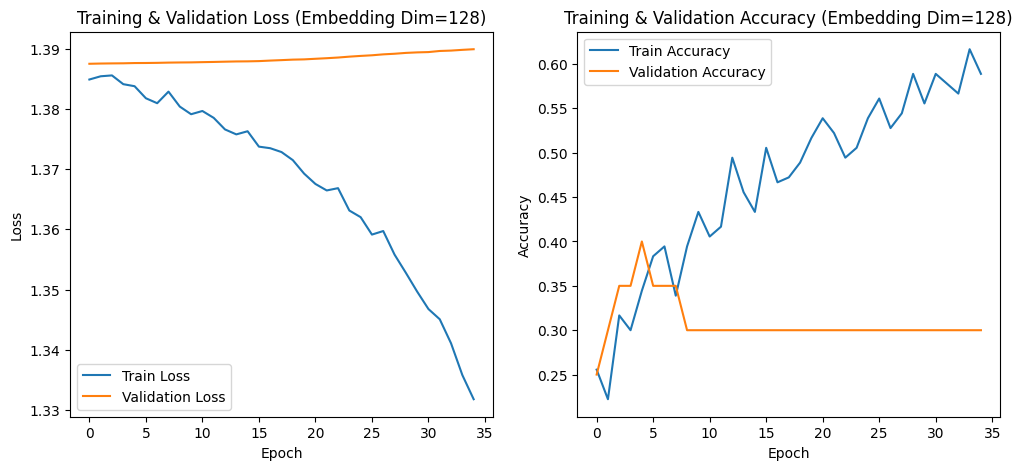

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (Embedding Dim=128)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (Embedding Dim=128)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 409ms/step - accuracy: 0.3010 - loss: 1.3819 - val_accuracy: 0.2000 - val_loss: 1.3859
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3480 - loss: 1.3817 - val_accuracy: 0.2000 - val_loss: 1.3860
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3589 - loss: 1.3811 - val_accuracy: 0.2000 - val_loss: 1.3859
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2967 - loss: 1.3825 - val_accuracy: 0.2000 - val_loss: 1.3860
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.3427 - loss: 1.3797 - val_accuracy: 0.2000 - val_loss: 1.3860
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.3717 - loss: 1.3762 - val_accuracy: 0.2000 - val_loss: 1.3860
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.3847 - loss: 1.3752 - val_accuracy: 0.2000 - val_loss: 1.3860
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.4362 - loss: 1.3739 - val_accuracy: 0.2000 - val_loss:

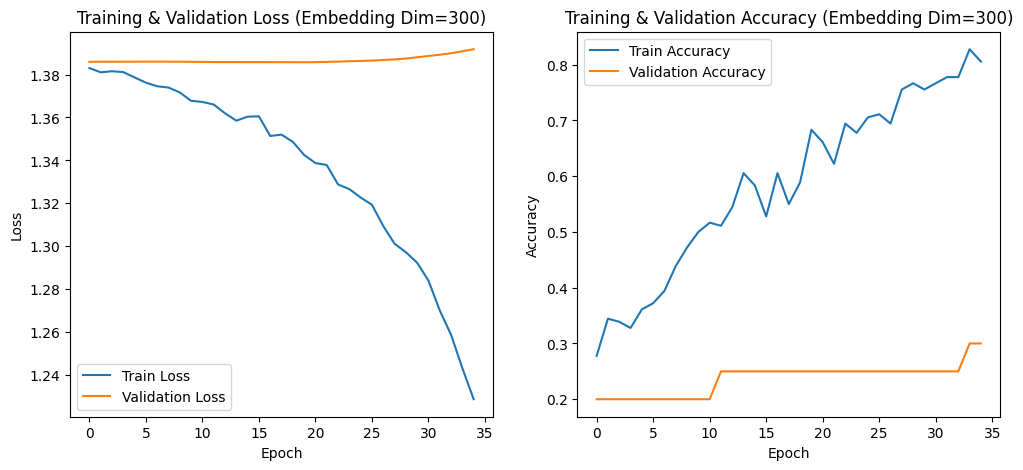

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=300, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(all_emotions), activation='softmax'))

# Compile with lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (Embedding Dim=300)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (Embedding Dim=300)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [17]:
# ================================
# Imports
# ================================
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ===============================
# Define required variables
# ===============================
MAX_NUM_WORDS = 10000            # Vocabulary size
MAX_SEQUENCE_LENGTH = 100        # Max sequence length after padding
all_emotions = ['happy', 'sad', 'angry', 'fear', 'love', 'surprise']  # Example classes

# ===============================
# Load and preprocess data (reusing steps from previous cells)
# ===============================
# Load your dataset
df = pd.read_excel("Express your emotions through text (Responses).xlsx", engine="openpyxl")

# Rename columns (assuming your columns are in this order based on previous cells)
df = df.rename(columns={
    df.columns[0]: 'happy',
    df.columns[1]: 'sad',
    df.columns[2]: 'angry',
    df.columns[3]: 'fear'
})

# Define cleaning and gibberish functions (reusing from previous cells)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def is_gibberish(text):
    if len(text) < 4:
        return True
    if not re.search(r'[aeiou]', text):
        return True
    return False

# Melt to long format
existing_cols = [col for col in ['happy','sad','angry','fear'] if col in df.columns]
df_melted = df.melt(value_vars=existing_cols, var_name='emotion', value_name='text')
df_melted = df_melted.dropna(subset=['text'])
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish']==False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)
df_valid = df_clean.reset_index(drop=True)


# Tokenization & Sequences
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df_valid['cleaned_text'])
df_valid['token_sequence'] = tokenizer.texts_to_sequences(df_valid['cleaned_text'])
X = pad_sequences(df_valid['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Labels
emotion_to_label = {emo:i for i, emo in enumerate(existing_cols)} # Use existing_cols for mapping
df_valid['emotion_label'] = df_valid['emotion'].map(emotion_to_label)
one_hot_labels = pd.get_dummies(df_valid['emotion'], prefix='emotion').reindex(
    columns=[f"emotion_{emo}" for emo in existing_cols], fill_value=0 # Use existing_cols for one-hot columns
)
y = one_hot_labels.values.astype(np.float32)  # ensure numeric type

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(existing_cols), activation='softmax')) # Use len(existing_cols) for output layer

# Compile with Adam optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
# Make sure X_train and y_train are properly prepared numpy arrays
# X_train should be padded sequences, y_train should be one-hot encoded
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (Adam)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (Adam)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Express your emotions through text (Responses).xlsx'

Epoch 1/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.2696 - loss: 1.3860 - val_accuracy: 0.3000 - val_loss: 1.3863
Epoch 2/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.2500 - loss: 1.3859 - val_accuracy: 0.3000 - val_loss: 1.3863
Epoch 3/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2518 - loss: 1.3860 - val_accuracy: 0.3000 - val_loss: 1.3862
Epoch 4/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2783 - loss: 1.3854 - val_accuracy: 0.2600 - val_loss: 1.3862
Epoch 5/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.2421 - loss: 1.3863 - val_accuracy: 0.2800 - val_loss: 1.3863
Epoch 6/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.2379 - loss: 1.3862 - val_accuracy: 0.2600 - val_loss: 1.3862
Epoch 7/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2603 - loss: 1.3863 - val_accuracy: 0.2400 - val_loss: 1.3860
Epoch 8/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.2728 - loss: 1.3856 - val_accuracy: 0.2600 - val_loss: 1.385

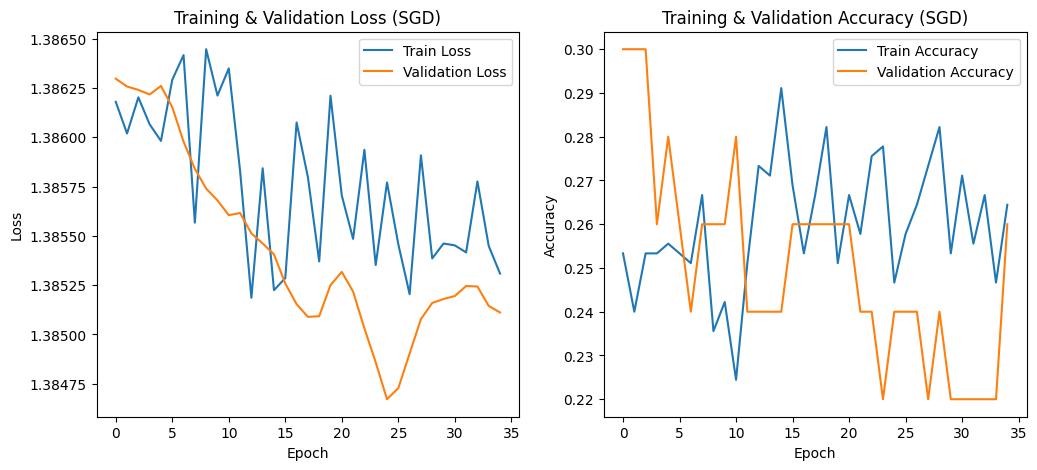

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np

# ===============================
# Define Parameters
# ===============================
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
existing_cols = ['angry', 'happy', 'sad', 'fear']  # Example emotion classes

# ===============================
# Dummy Data (replace with real preprocessed dataset)
# ===============================
# Example: 500 samples, each sequence has MAX_SEQUENCE_LENGTH words
X_train = np.random.randint(1, MAX_NUM_WORDS, size=(500, MAX_SEQUENCE_LENGTH))

# Example labels for classification (4 classes here)
y_train = np.random.randint(0, len(existing_cols), size=(500,))
y_train = to_categorical(y_train, num_classes=len(existing_cols))

# ===============================
# Model Definition
# ===============================
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(existing_cols), activation='softmax'))  # Output layer

# Compile with SGD optimizer
optimizer = SGD(learning_rate=0.0001, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===============================
# Train the Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

# ===============================
# Plot Training & Validation Curves
# ===============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
